In [1]:
from sm_scales_utils import *
import cartopy.crs as ccrs
import matplotlib.patches as mpatch
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import warnings
import pickle
import string
import sys
import wclass
import constants as cnst
from matplotlib.lines import Line2D
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
hues=sns.color_palette("colorblind")

FIGURE 1

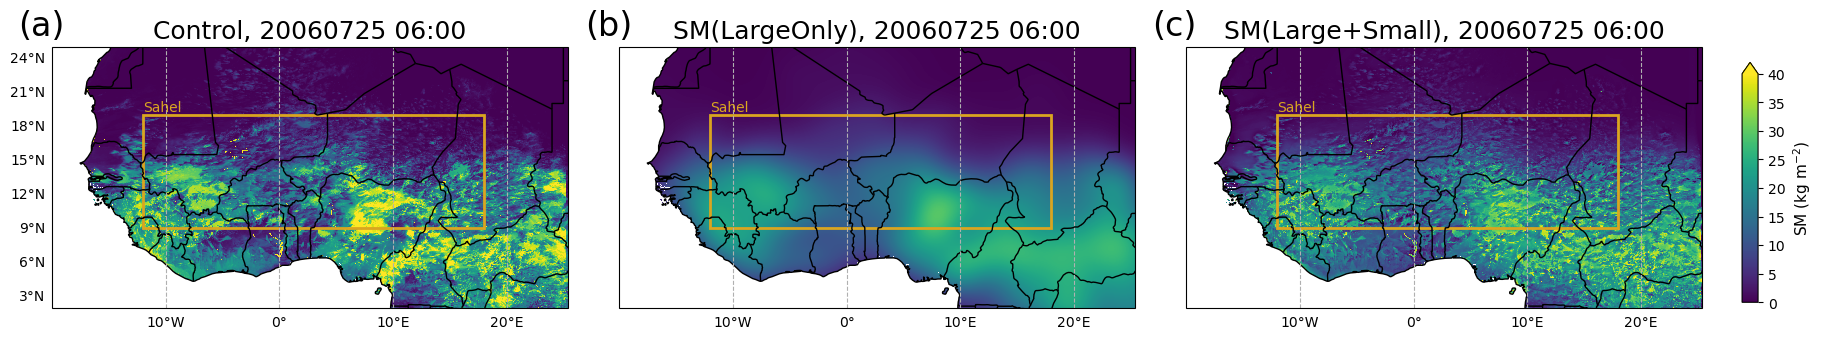

In [3]:
fig, axes = plt.subplots(1,3,figsize=(20,10),subplot_kw=dict(projection=ccrs.PlateCarree()),gridspec_kw={"wspace":0.1})

labs=["Control","SM(LargeOnly)", "SM(Large+Small)"]
for i, sim in enumerate(["Control_48hr_runs_D1","Large_only_D1","Wg_mcs_D1"]):
    #sm=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/{}_mean_sm_1p5km.nc".format(sim))[
    #                        "STASH_m01s08i223"].sel(hour=7,latitude=slice(2,25))#,longitude=slice(345,380))
    if i==0:
        sim="control_ref_D1"
    sm=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/Filtered_SM_initialisations/20060725_05Z_SM_filter_{}.nc".format(sim[:-3].lower()))[
                            "STASH_m01s08i223"].sel(grid_latitude_t=slice(2,25)).isel(T1HR=0,ATM_SOIL=0)#,longitude=slice(345,380))
    ax=axes[i]
    cb=sm.plot(ax=ax,add_colorbar=False,vmax=40,vmin=0)
    ax.set_title(labs[i]+", 20060725 06:00",fontsize=18)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    gl = ax.gridlines(crs = ccrs.PlateCarree(),draw_labels=True,linestyle="--")
    gl.ylines = False
    gl.top_labels = False
    gl.right_labels = False
    if i>0:
        gl.left_labels=False
    #gl.ylocator = mticker.FixedLocator([5,10,15,20])
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    ax.add_patch(mpatch.Rectangle((348,9),30,10,fill=False,edgecolor="goldenrod",lw=2,transform=ccrs.PlateCarree()))
    ax.text(348,19.3,"Sahel",color="goldenrod",transform=ccrs.PlateCarree())
    ax.text(337,26,"("+string.ascii_lowercase[i]+")",fontsize=24,transform=ccrs.PlateCarree())

fig.subplots_adjust(right=0.95)
cax = fig.add_axes([0.97,0.37,0.008,0.24])
clb=fig.colorbar(cb, cax = cax, orientation = "vertical", extend = "max").set_label(label="SM (kg m$^{-2}$)",fontsize=11)
fig.set_facecolor("white")
fig.tight_layout()

#fig.savefig("Paper_figs/Mean_SM_states.png",dpi=200,bbox_inches="tight",facecolor="white")
fig.savefig("Paper_figs/20060725_SM_states.png",dpi=200,bbox_inches="tight",facecolor="white")

In [4]:
dry_2dfields=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_2dfields_filt_diffPmax_hmoeller.nc")
dry_hfxs=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_hfxs_filt_diffPmax_hmoeller.nc")
sens_dry_2dfields=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_2dfields_filt_diffPmax_hmoeller.nc")
sens_dry_hfxs=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_hfxs_filt_diffPmax_hmoeller.nc")
wet_2dfields=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_2dfields_filt_diffPmaxWET_hmoeller.nc")
wet_hfxs=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_hfxs_filt_diffPmaxWET_hmoeller.nc")
sens_wet_2dfields=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_2dfields_filt_diffPmaxWET_hmoeller.nc")
sens_wet_hfxs=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_hfxs_filt_diffPmaxWET_hmoeller.nc")

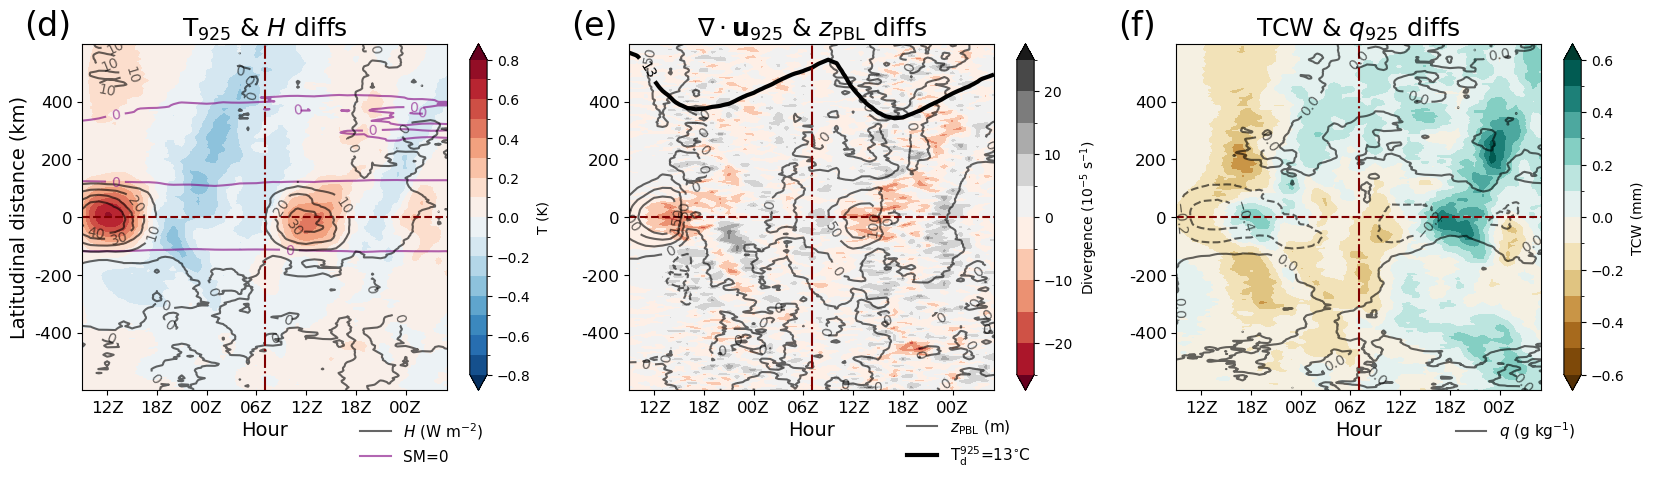

In [5]:
loc="diffPmax"
blfields=dry_2dfields-sens_dry_2dfields
hfxs=dry_hfxs-sens_dry_hfxs

fig,axes=plt.subplots(1,3,figsize=(20,4.5),gridspec_kw={"wspace":0.2,"hspace":0.3})

blfields.t925.plot.contourf(ax=axes[0],levels=np.arange(-0.8,0.9,0.1),extend="both",cbar_kwargs={"label":"T (K)"})
Cs=blfields.sm.coarsen(latitude=3,boundary="trim").mean().plot.contour(ax=axes[0],levels=[0],colors="Purple",alpha=0.6)
Ch=hfxs.shfx.coarsen(latitude=3,boundary="trim").mean().plot.contour(ax=axes[0],levels=np.arange(-40,41,10),colors="Black",alpha=0.6)
axes[0].clabel(Ch)
axes[0].clabel(Cs)
axes[0].set_title(r"T$_{925}$ & $H$ diffs",fontsize=18)
axes[0].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$H$ (W m$^{-2}$)"),
                        Line2D([],[], color="purple", alpha=0.6, label=r"SM=0")], 
               fontsize='11', bbox_to_anchor=(0.93,-0.15), frameon=False ,loc="center")

(10e5*blfields.horizontal_divergence).coarsen(latitude=5,boundary="trim").mean().plot.contourf(
                ax=axes[1],cmap="RdGy",levels=np.arange(-25,30,5),extend="both",cbar_kwargs={"label":"Divergence (10$^{-5}$ s$^{-1}$)"})
#Cs=(-1*blfields.ushear650_925_anom).coarsen(latitude=3,boundary="trim").mean().plot.contour(
#                                                        ax=axes[1],levels=np.arange(-1.5,3,0.5),colors="Black",alpha=0.6)
Cs=blfields.pblh_anom.coarsen(latitude=3,boundary="trim").mean().plot.contour(ax=axes[1],levels=np.arange(-150,175,50),colors="Black",alpha=0.6)
Ct=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_2dfields_filt_{}_hmoeller.nc".format(loc)
               ).td925.plot.contour(ax=axes[1],levels=[13],colors="Black",linewidths=3)
axes[1].clabel(Cs)
axes[1].clabel(Ct)
axes[1].set_title(r"$\nabla\cdot\mathbf{u}_{925}$ & $z_{\rm PBL}$ diffs",fontsize=18)
axes[1].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$z_{\rm PBL}$ (m)"),
                        Line2D([],[], color="k", lw=3 , label=r"$\rm T_d^{925}$=13$\!^\circ\!$C")], 
               fontsize='11', bbox_to_anchor=(0.93,-0.15), frameon=False ,loc="center")

(blfields.tcw).plot.contourf(ax=axes[2],levels=np.arange(-0.6,0.61,0.1),cmap="BrBG",extend="both",cbar_kwargs={"label":"TCW (mm)"})
Cte=(1000*blfields.q925).plot.contour(ax=axes[2],levels=np.arange(-0.6,0.61,0.2),colors="Black",alpha=0.6)
#Cte=blfields.theta_e925.coarsen(latitude=3,boundary="trim").mean().plot.contour(ax=axes[2],levels=np.arange(-2,3,0.4),colors="Black",alpha=0.6)
axes[2].clabel(Cte)
axes[2].set_title(r"TCW & $q_{925}$ diffs",fontsize=18)
axes[2].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$q$ (g kg$^{-1}$)")], 
               fontsize='11', bbox_to_anchor=(0.93,-0.115), frameon=False ,loc="center")

for i, ax in enumerate(axes):
    ax.set_ylabel("")
    ax.set_xlabel("Hour",fontsize=14)
    #ax.set_xticks(np.arange(9,31,3))
    #ax.set_xticklabels(["%02dZ"%(i%24) for i in np.arange(9,31,3)])
    ax.set_xlim([9,53])
    ax.set_xticks(np.arange(12,54,6))
    ax.set_xticklabels(["%02dZ"%(i%24) for i in np.arange(12,54,6)],fontsize=12)
    ax.set_yticks(np.arange(-400,500,200))
    ax.set_yticklabels(np.arange(-400,500,200),fontsize=12)
    ax.axhline(0,color="maroon",ls="--")
    ax.axvline(31,color="maroon",ls="-.")
    ax.text(2,630,"("+string.ascii_lowercase[i+3]+")",fontsize=24)
axes[0].set_ylabel("Latitudinal distance (km)",fontsize=14)

fig.savefig("Paper_figs/SMdry_MCS_hmoeller.png",dpi=200,bbox_inches="tight",facecolor="white")

In [6]:
wet_blfield_diffs=wet_2dfields-sens_wet_2dfields
wet_hfx_diffs=wet_hfxs-sens_wet_hfxs

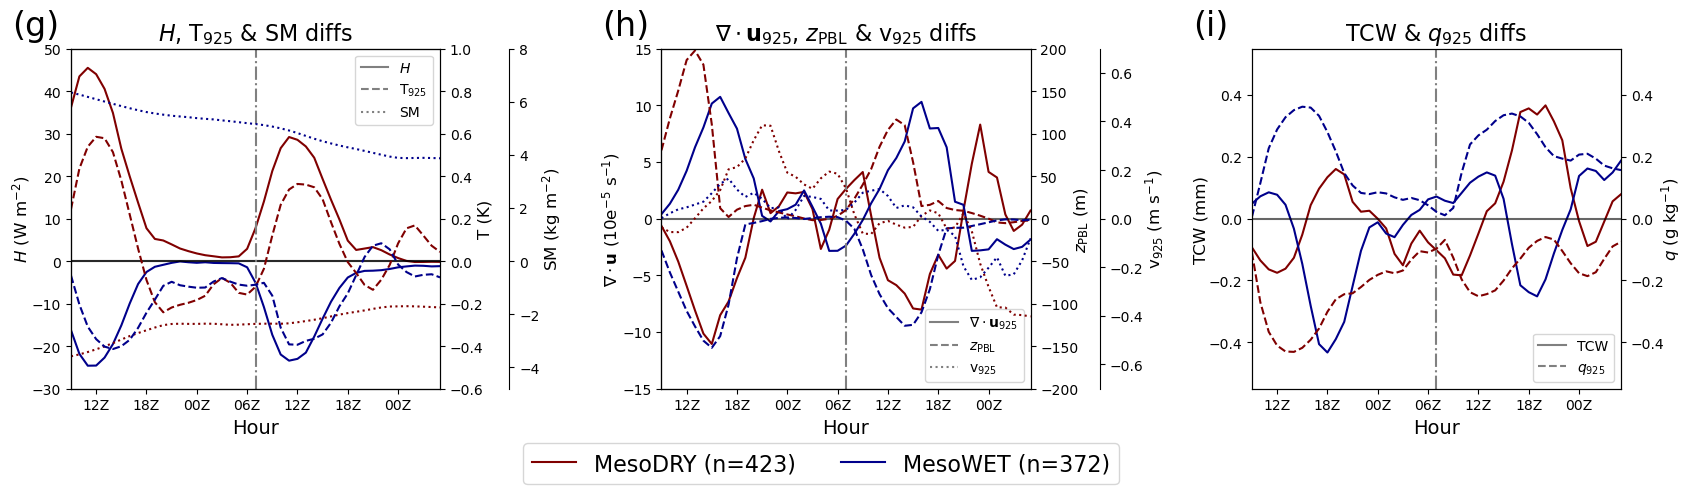

In [7]:
fig,axes=plt.subplots(1,3,figsize=(20,5),gridspec_kw={"wspace":0.6})
axes=axes.flatten()

hfxs.shfx.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=axes[0],color="maroon")
wet_hfx_diffs.shfx.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=axes[0],color="darkblue")
ax1=axes[0].twinx()
blfields.sm.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax1,ls=":",color="maroon")
wet_blfield_diffs.sm.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax1,ls=":",color="darkblue")
#ax1.yaxis.tick_left()
#ax1.yaxis.set_label_position("left")
ax1.spines['right'].set_position(('outward', 50))
ax2=axes[0].twinx()
blfields.t925.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax2,ls="--",color="maroon")
wet_blfield_diffs.t925.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax2,ls="--",color="darkblue")
#axes[0].legend()
#axes[0].set_ylim([-7.5,7.5])
axes[0].set_ylabel("$H$ (W m$^{-2}$)",labelpad=0,fontsize=12)
axes[0].set_ylim([-30,50])
ax2.set_ylim([-0.6,1])
ax2.set_ylabel("T (K)",labelpad=-4,fontsize=12)
ax1.set_ylim([-4.8,8])
ax1.set_ylabel("SM (kg m$^{-2})$",labelpad=0,fontsize=12)
axes[0].set_title(r"$H$, T$_{925}$ & SM diffs",fontsize=16)
axes[0].axhline(0,color="k",alpha=0.6)
legend_elements = [Line2D([],[],color="grey", marker="", label=r"$H$"),
                   Line2D([],[],color="grey", ls="--", marker="", label="T$_{925}$"),
                   Line2D([],[],color="grey", ls=":", marker="", label=r"SM"),]
axes[0].legend(handles=legend_elements)


(10e5*blfields.horizontal_divergence.sel(latitude=slice(-75,75))).mean(dim="latitude").plot(ax=axes[1],color="maroon")
(10e5*wet_blfield_diffs.horizontal_divergence.sel(latitude=slice(-75,75))).mean(dim="latitude").plot(ax=axes[1],color="darkblue")
ax1=axes[1].twinx()
blfields.pblh.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax1,ls="--",color="maroon")
wet_blfield_diffs.pblh.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax1,ls="--",color="darkblue")
ax2=axes[1].twinx()
ax2.spines['right'].set_position(('outward', 50))
blfields.v925.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax2,ls=":",color="maroon")
wet_blfield_diffs.v925.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax2,ls=":",color="darkblue")
#axes[1].legend()
#ax1.legend()
axes[1].set_ylim([-15,15])
axes[1].set_ylabel(r"$\nabla\cdot\mathbf{u}$ (10e$^{-5}$ s$^{-1}$)",labelpad=0,fontsize=12)
ax1.set_ylim([-200,200])
ax1.set_ylabel(r"$z_{\rm PBL}$ (m)",labelpad=-4,fontsize=12)
ax2.set_ylim([-0.7,0.7])
ax2.set_ylabel(r"$\rm v_{925}$ (m s$^{-1}$)",labelpad=0,fontsize=12)
axes[1].set_title(r"$\nabla\cdot\mathbf{u}_{925}$, $z_{\rm PBL}$ & $\rm v_{925}$ diffs",fontsize=16)
legend_elements = [Line2D([],[],color="grey", marker="", label=r"$\nabla\cdot\mathbf{u}_{925}$"),
                   Line2D([],[],color="grey", ls="--", marker="", label=r"$z_{\rm PBL}$"),
                   Line2D([],[],color="grey", ls=":", marker="", label=r"$\rm v_{925}$")]
axes[1].legend(handles=legend_elements)


blfields.tcw.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=axes[2],color="maroon")
wet_blfield_diffs.tcw.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=axes[2],color="darkblue")
ax1=axes[2].twinx()
#blfields.theta_e925.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax1,label=r"$\theta_e$",color="maroon",ls="--")
#wet_blfield_diffs.theta_e925.sel(latitude=slice(-75,75)).mean(dim="latitude").plot(ax=ax1,color="darkblue",ls="--")
(1000*blfields.q925.sel(latitude=slice(-75,75))).mean(dim="latitude").plot(ax=ax1,color="maroon",ls="--")
(1000*wet_blfield_diffs.q925.sel(latitude=slice(-75,75))).mean(dim="latitude").plot(ax=ax1,color="darkblue",ls="--")
"""
ax2=axes[2].twinx()
ax2.spines['right'].set_position(('outward', 50))
(1000*blfields.q800.sel(latitude=slice(-75,75))).mean(dim="latitude").plot(ax=ax2,color="maroon",ls=":")
(1000*wet_blfield_diffs.q800.sel(latitude=slice(-75,75))).mean(dim="latitude").plot(ax=ax2,color="darkblue",ls=":")
"""
axes[2].set_ylim([-0.55,0.55])
axes[2].set_ylabel("TCW (mm)",labelpad=0,fontsize=12)
ax1.set_ylim([-0.55,0.55])
ax1.set_ylabel(r"$q$ (g kg$^{-1}$)",labelpad=-4,fontsize=12)
#ax2.set_ylim([-0.6,0.6])
#ax2.set_ylabel(r"$q_{800}$ (g kg$^{-1}$)",labelpad=0,fontsize=12)
axes[2].set_title(r"TCW & $q_{925}$ diffs",fontsize=16)
#axes[5].axhline(0,color="k",alpha=0.6)
legend_elements = [Line2D([],[],color="grey", marker="", label="TCW"),
                   Line2D([],[],color="grey", ls="--", marker="", label=r"$q_{925}$")]#,
                   #Line2D([],[],color="grey", ls=":", marker="", label=r"$q_{800}$")]
axes[2].legend(handles=legend_elements,loc="lower right")


for i, ax in enumerate(axes):
    ax.set_xlabel("Hour",fontsize=14)
    ax.set_xticks(np.arange(12,54,6))
    ax.set_xticklabels(["%02dZ"%(i%24) for i in np.arange(12,54,6)])
    ax.set_xlim([9,53])
    ax.axhline(0,color="k",alpha=0.6)
    ax.axvline(31,color="grey",ls="-.")
    ax.text(-0.16,1.04,"("+string.ascii_lowercase[i+6]+")",fontsize=24,transform=axes[i].transAxes)

legend_elements = [Line2D([],[],color="maroon", marker="", label='MesoDRY (n=%03d)'%dry_2dfields.attrs["number_cores"]),
                   Line2D([],[],color="darkblue", marker="", label='MesoWET (n=%03d)'%wet_2dfields.attrs["number_cores"])]
fig.subplots_adjust(bottom=0.2)
fig.legend(handles=legend_elements, fontsize='16', ncol=2, bbox_to_anchor=(0.5,0.05), loc="center")
#fig.suptitle("Control run - SM(Large+Small), 150km diffPmax central field evolution",y=1,fontsize=15)
#fig.text(0.105,0.975,"SM DRY, Control - SM(Large+Small)",fontsize=22)
fig.savefig("Paper_figs/SMdry_wet_1d_evolution.png",dpi=200,bbox_inches="tight",facecolor="white")

FIGURE 2

In [8]:
def diurnal_cycle(var,unit,rstr="",days=2):
    stash=var
    if var not in ["td925"]:
        try:
            plev=int(var[-3:])
            stash=var[0]+"_plevs"
        except:
            pass

    if len(rstr)!=0:
        rstr="_"+rstr

    if var=="shfx":
        con=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Control_run_mean_{}_1p5km.nc".format(var))[stash_dict["shfx_con"]].sel(
            latitude=slice(9,19),longitude=slice(348,378)).mean(dim=["longitude","latitude"]).to_series() 
    else:
        con=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Control_48hr_runs_D1{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
        latitude=slice(9,19),longitude=slice(348,378)).mean(dim=["longitude","latitude"]).to_series()
    con=pd.concat([con.iloc[7:],con.iloc[:7]])
    con.index=["%02dZ"%i for i in con.index]
    wg=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Wg_mcs_D1{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
        latitude=slice(9,19),longitude=slice(348,378)).mean(dim=["longitude","latitude"]).to_series()
    wg=pd.concat([wg.iloc[7:],wg.iloc[:7]])
    wg.index=["%02dZ"%i for i in wg.index]
    LO=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Large_only_D1{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
        latitude=slice(9,19),longitude=slice(348,378)).mean(dim=["longitude","latitude"]).to_series()
    LO=pd.concat([LO.iloc[7:],LO.iloc[:7]])
    LO.index=["%02dZ"%i for i in LO.index]
    if days==2:
        con2=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Control_48hr_runs_D2{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
            latitude=slice(9,19),longitude=slice(348,378)).mean(dim=["longitude","latitude"]).to_series()
        con2=pd.concat([con2.iloc[7:],con2.iloc[:7]])
        con2.index=["%02dZ"%i for i in con2.index]
        LO2=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Large_only_D2{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
            latitude=slice(9,19),longitude=slice(348,378)).mean(dim=["longitude","latitude"]).to_series()
        LO2=pd.concat([LO2.iloc[7:],LO2.iloc[:7]])
        LO2.index=["%02dZ"%i for i in LO2.index]
        wg2=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Wg_mcs_D2{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
            latitude=slice(9,19),longitude=slice(348,378)).mean(dim=["longitude","latitude"]).to_series()
        wg2=pd.concat([wg2.iloc[7:],wg2.iloc[:7]])
        wg2.index=["%02dZ"%i for i in wg2.index]
        
    fact=1
    if var=="precip":
        fact=3600
    elif var=="tcc":
        fact=100
    elif stash=="q_plevs":
        fact=1000

    D1=pd.concat([fact*con.rename("Control"),fact*wg.rename("SM(Large+Small"),fact*LO.rename("SM(LargeOnly)")],axis=1)
    D2=pd.concat([fact*con2.rename("Control"),fact*wg2.rename("SM(Large+Small"),fact*LO2.rename("SM(LargeOnly)")],axis=1)
    
    return D1, D2

In [9]:
ref_olr=xr.open_dataset('/gws/nopw/j04/lmcs/u-cy045_control_run/u-cy045/20060725T0000Z/Sahel/1p5km/RA3/um/surface_vars_20060725_T01.nc'
                       ).STASH_m01s02i205[:2200,:3300]
ref_olr=ref_olr.assign_coords(longitude=ref_olr.grid_longitude_t-360)
ref_lons=ref_olr.grid_longitude_t
ref_lats=ref_olr.grid_latitude_t

In [10]:
def get_storm_endtime(data):
    ltimes=[]
    for i in range(len(data)):
        ltime=len(data.iloc[i].filter(regex="area").dropna())
        ltimes.append(data.start_time.iloc[i] + pd.Timedelta(ltime,"h"))
    data.insert(2,"end_time",ltimes)
    return data

In [11]:
def get_sens_tracks(expt,mcs=True):
    sens=[]
    if mcs:
        for ffile in glob.glob("/home/users/bmaybee/LMCS/LMCS_Wafrica_sim/MCS_analysis/Tables/{}/*Z_MCS*rain.csv".format(expt)):
            dayfile=pd.read_csv(ffile)
            dayfile["start_time"]=pd.to_datetime(dayfile["start_time"])
            dayfile=dayfile.drop(columns=["tmin_min","mcs_thld"])
            dayfile.insert(2,"sim_start",dayfile.start_time.iloc[0])
            dayfile.insert(3,"sim_end",dayfile.start_time.iloc[0]+pd.Timedelta(47,"h"))
            # Apply rainfall filter; area filter already applied in generation of csv track data (pre-rainfall calculation)
            dayfile=dayfile[dayfile.filter(regex="rain_max").max(axis=1)>1]
            sens.append(dayfile)
    else:
        for ffile in glob.glob("/home/users/bmaybee/LMCS/LMCS_Wafrica_sim/MCS_analysis/Tables/{}/*Z_MCS*output.csv".format(expt)):
            dayfile=pd.read_csv(ffile)
            dayfile=pd.read_csv(ffile)
            dayfile.insert(0,"storm_id",np.arange(1,len(dayfile)+1))
            #dayfile = dayfile[dayfile.columns.drop(list(dayfile.filter(regex='rain')))]
            dayfile["start_time"]=pd.to_datetime(dayfile["start_time"],format="%Y%m%d_%H%M")
            dayfile.insert(2,"sim_start",dayfile.start_time.iloc[0])
            dayfile.insert(3,"sim_end",dayfile.start_time.iloc[0]+pd.Timedelta(47,"h"))
            sens.append(dayfile)
    
    sens=pd.concat(sens)
    sens=sens.reset_index(drop=True)
    sens=get_storm_endtime(sens.sort_values(by="start_time"))
    sens.insert(5,"init_day",(sens["start_time"]-sens["sim_start"]).dt.days)

    # Initiation location filter: MCS must initiate within "West Africa" domain
    sens["clon_idx_00"]=sens["clon_idx_00"].apply(lambda x: float(ref_lons[int(np.round(x))]) )
    sens["clat_idx_00"]=sens["clat_idx_00"].apply(lambda x: float(ref_lats[int(np.round(x))]) )
    sens=sens[(sens["clon_idx_00"]<=384) & (sens["clon_idx_00"]>=348) 
                            & (sens["clat_idx_00"]<=19) & (sens["clat_idx_00"]>=9)] 

    
    return sens

In [12]:
control48_MCS=get_sens_tracks("control_48hr_runs")

In [13]:
LO_MCS=get_sens_tracks("sensitivity_runs_large_only")

In [14]:
wg_MCS=get_sens_tracks("sensitivity_runs_wg_mcs")

In [15]:
def get_track_hours(MCS_data,storm=False):
    if MCS_data.filter(regex="hour").shape[1]>0:
        print("Hour values already calculated - reload dataset if need to be redone")
        return MCS_data
        
    else:
        for hr in range(int((MCS_data.shape[1] - 6 - storm*2)/10)):
            MCS_data["hour_%02d"%hr]=(MCS_data["start_time"]+pd.Timedelta(hr,"h")).dt.hour[~pd.isna(MCS_data["area_%02d"%hr])]

        return MCS_data

In [16]:
control48_MCS=get_track_hours(control48_MCS)
LO_MCS=get_track_hours(LO_MCS)
wg_MCS=get_track_hours(wg_MCS)

In [17]:
def unique_day_sep(sens_data):
    sens_data_day1,sens_data_day2=[],[]
    for k in range(len(sens_data)):
        # select each unique storm, i.e. row:
        storm=sens_data.iloc[k]
        #print(bob.start_time - bob.sim_start)
        # if storm was init on day 2 then trivially belongs on day 2
        if (storm.start_time - storm.sim_start).days>=1:
            sens_data_day2.append(storm)
            continue

        # Meanwhile if end time is within a day of the simulation start time, trivially within day 1
        if (storm.end_time - storm.sim_start).days<1:
            sens_data_day1.append(storm)
            continue

        # if get to here then have a storm which spans day 1 and 2. Thus need to split at the relevant hr.
        hrs_D1=int(((storm.sim_start+pd.Timedelta(1,"d")) - storm.start_time).total_seconds()/3600.)
        # might well be a better way to do this, but code works fine:
        batch1,batch2=[],[]
        for i in range(hrs_D1):
            batch1.append(storm.filter(regex="_%02d"%i))
        for j in range(hrs_D1,len(storm.filter(regex="area"))):
            batch2.append(storm.filter(regex="_%02d"%j))
        batch1=pd.concat(batch1)
        batch2=pd.concat(batch2)
    
        # only got columns with _hr appelation currently, so stick the other key labels back on! Common to both batches as label the storm.
        batch1=pd.concat([storm[:6],batch1])
        batch2=pd.concat([storm[:6],batch2])
    
        sens_data_day1.append(batch1)
        sens_data_day2.append(batch2)
    
    sens_data_day1=pd.concat(sens_data_day1,axis=1).T
    sens_data_day2=pd.concat(sens_data_day2,axis=1).T

    sens_data_day1["start_time"]=pd.to_datetime(sens_data_day1.start_time)
    sens_data_day1["end_time"]=pd.to_datetime(sens_data_day1.end_time)
    sens_data_day2["start_time"]=pd.to_datetime(sens_data_day2.start_time)
    sens_data_day2["end_time"]=pd.to_datetime(sens_data_day2.end_time)
    return sens_data_day1, sens_data_day2

In [18]:
control_D1, control_D2 = unique_day_sep(control48_MCS)
LO_D1, LO_D2 = unique_day_sep(LO_MCS)
wg_D1, wg_D2 = unique_day_sep(wg_MCS)

In [19]:
precipDCs = diurnal_cycle("precip","mm")

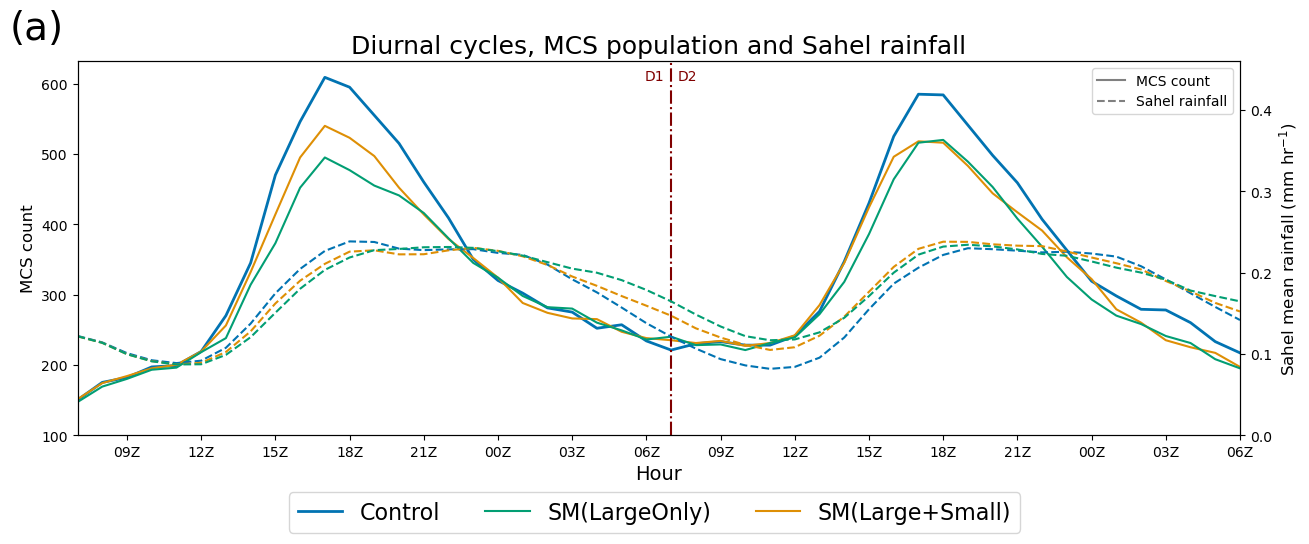

In [20]:
bins=[]
for i, props in enumerate([control_D1, wg_D1, LO_D1, control_D2, wg_D2, LO_D2]):
    props=props.copy()
    props["start_time"]=pd.to_datetime(props["start_time"])
    props["sim_start"]=pd.to_datetime(props["sim_start"])
    hours=props.filter(regex="hour").values.flatten().astype(float)
    hours=hours[~np.isnan(hours)]
    stat=stats.binned_statistic(hours,hours,statistic='count',bins=24,range=(0,24))
    df=pd.DataFrame(np.vstack([stat.bin_edges[:-1],stat.statistic]).T,columns=["Hour","Count"])
    # rearranging diurnal cycle from 00Z - 00Z to 07Z to 07Z
    df=pd.concat([df.iloc[7:],df.iloc[:7]])
    df.index=["%02dZ"%i for i in df.index]
    bins.append(df)
                
fig,ax=plt.subplots(1,1,figsize=(15,5.5))

pd.concat([bins[0],bins[3]]).Count.plot(ax=ax,color=hues[0],lw=2)#"darkseagreen")
pd.concat([bins[1],bins[4]]).Count.plot(ax=ax,color=hues[1])#"mediumturquoise")
pd.concat([bins[2],bins[5]]).Count.plot(ax=ax,color=hues[2])

ax1=ax.twinx()
pd.concat([precipDCs[0],precipDCs[1]]).plot(ax=ax1,ls="--",color=hues)

ax.set_xlabel("Hour",fontsize=14)
ax.set_xlim([0,47])
ax.set_ylim([100,None])
ax.set_ylabel("MCS count",fontsize=12)
ax.set_xticks(np.arange(2,48,3))
ax.set_xticklabels(["%02dZ"%((hr+7)%24) for hr in np.arange(2,48,3)])
ax1.set_ylim([0,0.46])
ax1.get_legend().remove()
ax1.set_ylabel("Sahel mean rainfall (mm hr$^{-1}$)",fontsize=12)

ax.axvline(24,color="maroon",ls="-.")
ax.text(0.488,0.95,"D1",color="maroon",transform=ax.transAxes)
ax.text(0.516,0.95,"D2",color="maroon",transform=ax.transAxes)
ax.set_title("Diurnal cycles, MCS population and Sahel rainfall",fontsize=18)

legend_elements = [Line2D([],[],color="grey", marker="", label="MCS count"),
                   Line2D([],[],color="grey", ls="--", marker="", label="Sahel rainfall")]
ax.legend(handles=legend_elements,loc="upper right")

legend_elements = [Line2D([],[],color=hues[0], lw=2, marker="", label='Control'),
                   Line2D([],[],color=hues[2], marker="", label='SM(LargeOnly)'),
                   Line2D([],[],color=hues[1], marker="", label='SM(Large+Small)')]
fig.subplots_adjust(bottom=0.2)
fig.legend(handles=legend_elements, fontsize='16', ncol=3, loc="lower center")

fig.text(0.08,0.92,"(a)",fontsize=28)
fig.savefig("Paper_figs/MCS_diurnal_cycle.png",dpi=200,bbox_inches="tight",facecolor="white")

In [21]:
print("Control peak count vs LO, D1: ",bins[0].Count.loc["17Z"]/bins[2].Count.loc["17Z"])
print("Control peak count vs LO, D2: ",bins[3].Count.loc["17Z"]/bins[4].Count.loc["17Z"])
print("Control peak count vs L+S, D1: ",bins[0].Count.loc["17Z"]/bins[1].Count.loc["17Z"])
print("Control peak count vs L+S, D2: ",bins[3].Count.loc["17Z"]/bins[5].Count.loc["17Z"])
print("L+S peak count vs LO, D1: ",bins[1].Count.loc["17Z"]/bins[2].Count.loc["17Z"])
print("LO D2 peak count vs D1: ",bins[4].Count.loc["17Z"]/bins[2].Count.loc["17Z"])

Control peak count vs LO, D1:  1.2303030303030302
Control peak count vs LO, D2:  1.1293436293436294
Control peak count vs L+S, D1:  1.1277777777777778
Control peak count vs L+S, D2:  1.1337209302325582
L+S peak count vs LO, D1:  1.0909090909090908
LO D2 peak count vs D1:  1.0464646464646465


In [22]:
print("Control, WgD1: ",stats.ks_2samp(bins[0].Count,bins[1].Count))
print("Control, LOd1: ",stats.ks_2samp(bins[0].Count,bins[2].Count))
print("Control, LOd2: ",stats.ks_2samp(bins[5].Count,bins[3].Count))
print("LOd1, WgD1: ",stats.ks_2samp(bins[2].Count,bins[1].Count))

Control, WgD1:  KstestResult(statistic=np.float64(0.16666666666666666), pvalue=np.float64(0.9024001944012529), statistic_location=np.float64(540.0), statistic_sign=np.int8(-1))
Control, LOd1:  KstestResult(statistic=np.float64(0.20833333333333334), pvalue=np.float64(0.686017125117228), statistic_location=np.float64(495.0), statistic_sign=np.int8(-1))
Control, LOd2:  KstestResult(statistic=np.float64(0.16666666666666666), pvalue=np.float64(0.9024001944012529), statistic_location=np.float64(272.0), statistic_sign=np.int8(1))
LOd1, WgD1:  KstestResult(statistic=np.float64(0.125), pvalue=np.float64(0.994161229482218), statistic_location=np.float64(477.0), statistic_sign=np.int8(1))


In [23]:
def get_diurnal_var(MCS_data,var):
    diurnal_dict={}
    for hr in np.arange(24):
        diurnal_dict["%02d"%hr]=[]

    if "tmin_min" in list(MCS_data.columns):
        MCS_data=MCS_data.drop(columns=["tmin_min"])
    for i in range(len(MCS_data)):
        storm=MCS_data.iloc[i]
        t=storm.start_time
        #if t==storm.sim_start:
        #    continue
        storm=storm.filter(regex=var).dropna()
        for h in range(len(storm)):
            #hr=(t+pd.Timedelta(h,"h")).hour ORIG ORIG
            hr=storm.index[h].split("_")[-1]
            try:
                hr=(t+pd.Timedelta(int(hr),"h")).hour
            except:
                print(storm.index[h],i)
                continue
            # Remove entry of features from storms killed by configuration - causes artificial spikes in DC
            #if t+pd.Timedelta(h,"h")==control_MCS.sim_end.iloc[i]:
            #    continue
            diurnal_dict["%02d"%hr].append(storm.iloc[h])

    return diurnal_dict

In [24]:
# by design, exclude all storms which are intiialised at start time; pollutes results for sensitivity, as have many mature nocturnal storms inherited from control
def var_dc(MCS_data,var,perc_up=1,perc_bot=0):
    #MCS_data=MCS_data[(MCS_data.start_time!=MCS_data.sim_start)]
    dc=get_diurnal_var(MCS_data,var)
    
    for hr in list(dc.keys()):
        dc[hr]=pd.Series(dc[hr],name=hr+"Z")
        dc[hr]=dc[hr][(dc[hr]<=dc[hr].quantile(perc_up)) & (dc[hr]>=dc[hr].quantile(perc_bot))]

    dc=[dc[hr] for hr in list(dc.keys())]
    df=pd.concat(dc,axis=1).T
    df=pd.concat([df.iloc[7:],df.iloc[:7]])
    return df

In [25]:
controlD1_dc_areas=1.5**2*var_dc(control_D1,"area",perc_up=0.95)
controlD1_dc_areas.loc["07Z"]=np.nan
WGd1_dc_areas=1.5**2*var_dc(wg_D1,"area",perc_up=0.95)
WGd1_dc_areas.loc["07Z"]=np.nan
LOd1_dc_areas=1.5**2*var_dc(LO_D1,"area",perc_up=0.95)
LOd1_dc_areas.loc["07Z"]=np.nan

controlD1_dc_maxrains=var_dc(control_D1,"rain_max",perc_up=0.95)
controlD1_dc_maxrains.loc["07Z"]=np.nan
WGd1_dc_maxrains=var_dc(wg_D1,"rain_max",perc_up=0.95)
WGd1_dc_maxrains.loc["07Z"]=np.nan
LOd1_dc_maxrains=var_dc(LO_D1,"rain_max",perc_up=0.95)
LOd1_dc_maxrains.loc["07Z"]=np.nan

controlD1_dc_tmeans=var_dc(control_D1,"tmean")
controlD1_dc_tmeans.loc["07Z"]=np.nan
WGd1_dc_tmeans=var_dc(wg_D1,"tmean")
WGd1_dc_tmeans.loc["07Z"]=np.nan
LOd1_dc_tmeans=var_dc(LO_D1,"tmean")
LOd1_dc_tmeans.loc["07Z"]=np.nan

controlD1_dc_tmins=var_dc(control_D1,"tmin")
WGd1_dc_tmins=var_dc(wg_D1,"tmin")
WGd1_dc_tmins.loc["07Z"]=np.nan
LOd1_dc_tmins=var_dc(LO_D1,"tmin")
LOd1_dc_tmins.loc["07Z"]=np.nan

In [26]:
controlD2_dc_areas=1.5**2*var_dc(control_D2,"area",perc_up=0.95)
WGd2_dc_areas=1.5**2*var_dc(wg_D2,"area",perc_up=0.95)
LOd2_dc_areas=1.5**2*var_dc(LO_D2,"area",perc_up=0.95)

controlD2_dc_maxrains=var_dc(control_D2,"rain_max",perc_up=0.95)
WGd2_dc_maxrains=var_dc(wg_D2,"rain_max",perc_up=0.95)
LOd2_dc_maxrains=var_dc(LO_D2,"rain_max",perc_up=0.95)

controlD2_dc_tmeans=var_dc(control_D2,"tmean")
WGd2_dc_tmeans=var_dc(wg_D2,"tmean")
LOd2_dc_tmeans=var_dc(LO_D2,"tmean")

controlD2_dc_tmins=var_dc(control_D2,"tmin")
WGd2_dc_tmins=var_dc(wg_D2,"tmin")
LOd2_dc_tmins=var_dc(LO_D2,"tmin")

In [27]:
controlD1_dc_rainvols=var_dc(control_D1,"rain_vol",perc_up=0.9)
controlD1_dc_rainvols.loc["07Z"]=np.nan
WGd1_dc_rainvols=var_dc(wg_D1,"rain_vol",perc_up=0.9)
WGd1_dc_rainvols.loc["07Z"]=np.nan
LOd1_dc_rainvols=var_dc(LO_D1,"rain_vol",perc_up=0.9)
LOd1_dc_rainvols.loc["07Z"]=np.nan

controlD2_dc_rainvols=var_dc(control_D2,"rain_vol",perc_up=0.95)
WGd2_dc_rainvols=var_dc(wg_D2,"rain_vol",perc_up=0.95)
LOd2_dc_rainvols=var_dc(LO_D2,"rain_vol",perc_up=0.95)

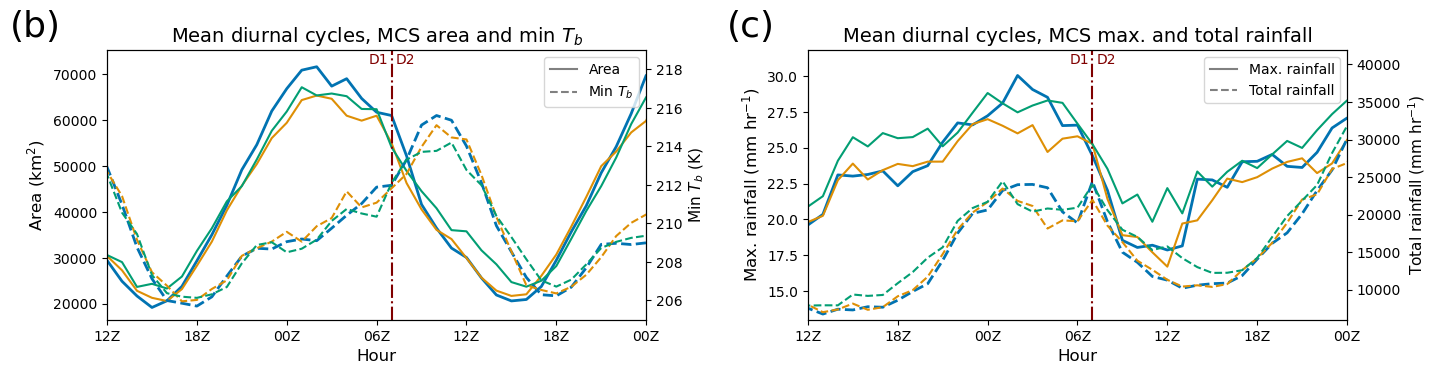

In [28]:
fig,axes=plt.subplots(1,2,figsize=(16,3.5),gridspec_kw={"wspace":0.3})
pd.concat([controlD1_dc_areas,controlD2_dc_areas]).mean(axis=1).plot(ax=axes[0],color=hues[0],lw=2)#"darkseagreen")
pd.concat([WGd1_dc_areas.mean(axis=1),WGd2_dc_areas.mean(axis=1)]).plot(ax=axes[0],color=hues[1])#"mediumturquoise")
pd.concat([LOd1_dc_areas.mean(axis=1),LOd2_dc_areas.mean(axis=1)]).plot(ax=axes[0],color=hues[2])
ax1=axes[0].twinx()
pd.concat([controlD1_dc_tmins.mean(axis=1),controlD2_dc_tmins.mean(axis=1)]).plot(ax=ax1,color=hues[0],ls="--",lw=2)#"darkseagreen")
pd.concat([WGd1_dc_tmins.mean(axis=1),WGd2_dc_tmins.mean(axis=1)]).plot(ax=ax1,color=hues[1],ls="--")#"mediumturquoise")
pd.concat([LOd1_dc_tmins.mean(axis=1),LOd2_dc_tmins.mean(axis=1)]).plot(ax=ax1,color=hues[2],ls="--")
axes[0].set_ylabel("Area (km$^2$)",fontsize=12)
ax1.set_ylabel("Min $T_b$ (K)",fontsize=11)
ax1.set_ylim([205,219])
#ax1.set_ylim([221,235])
axes[0].set_title("Mean diurnal cycles, MCS area and min $T_b$",fontsize=14)
legend_elements = [Line2D([],[],color="grey", marker="", label="Area"),
                   Line2D([],[],color="grey", ls="--", marker="", label="Min $T_b$")]
axes[0].legend(handles=legend_elements,loc="upper right")

pd.concat([controlD1_dc_maxrains.mean(axis=1),controlD2_dc_maxrains.mean(axis=1)]).plot(ax=axes[1],color=hues[0],lw=2)#"darkseagreen")
pd.concat([WGd1_dc_maxrains.mean(axis=1),WGd2_dc_maxrains.mean(axis=1)]).plot(ax=axes[1],color=hues[1])#"mediumturquoise")
pd.concat([LOd1_dc_maxrains.mean(axis=1),LOd2_dc_maxrains.mean(axis=1)]).plot(ax=axes[1],color=hues[2])
ax1=axes[1].twinx()
pd.concat([controlD1_dc_rainvols.mean(axis=1),controlD2_dc_rainvols.mean(axis=1)]).plot(ax=ax1,color=hues[0],ls="--",lw=2)#"darkseagreen")
pd.concat([WGd1_dc_rainvols.mean(axis=1),WGd2_dc_rainvols.mean(axis=1)]).plot(ax=ax1,color=hues[1],ls="--")#"mediumturquoise")
pd.concat([LOd1_dc_rainvols.mean(axis=1),LOd2_dc_rainvols.mean(axis=1)]).plot(ax=ax1,color=hues[2],ls="--")
axes[1].set_ylabel("Max. rainfall (mm hr$^{-1}$)",fontsize=12)
axes[1].set_ylim([13,31.8])
ax1.set_ylim([6000,41900])
ax1.set_ylabel("Total rainfall (mm hr$^{-1}$)",fontsize=11)
axes[1].set_title("Mean diurnal cycles, MCS max. and total rainfall",fontsize=14)
legend_elements = [Line2D([],[],color="grey", marker="", label="Max. rainfall"),
                   Line2D([],[],color="grey", ls="--", marker="", label="Total rainfall")]
axes[1].legend(handles=legend_elements,loc="upper right")

for i,ax in enumerate(axes):
    ax.set_xlabel("Hour",fontsize=12)
    ax.set_xlim([5,41])
    ax.set_xticks(np.arange(5,42,6))
    ax.set_xticklabels(["%02dZ"%((hr+7)%24) for hr in np.arange(5,42,6)])
    ax.axvline(24,color="maroon",ls="-.")
    ax.text(0.486,0.95,"D1",color="maroon",transform=ax.transAxes)
    ax.text(0.536,0.95,"D2",color="maroon",transform=ax.transAxes)

axes[0].text(-0.18,1.05,"(b)", fontsize=26,transform=axes[0].transAxes)
axes[1].text(-0.15,1.05,"(c)", fontsize=26,transform=ax.transAxes)
fig.savefig("Paper_figs/MCS_properties_dcs.png",dpi=200,bbox_inches="tight",facecolor="white")

Text(-0.22, 1.05, 'b)')

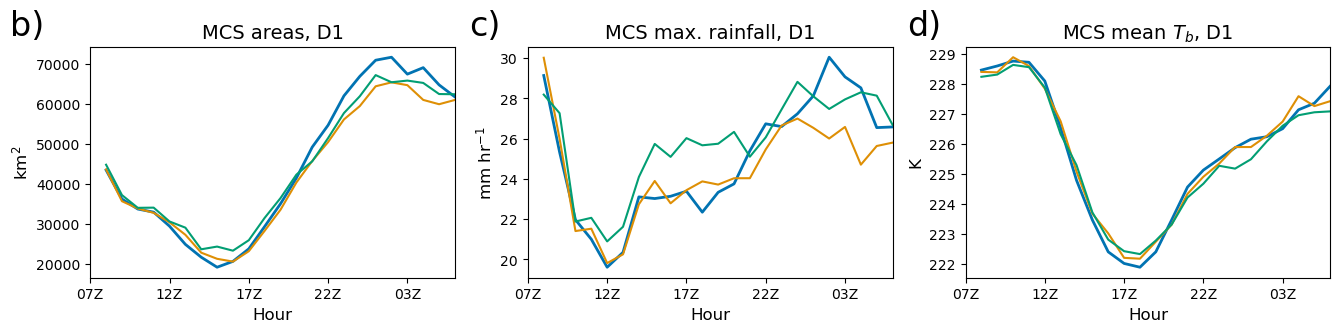

In [29]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
controlD1_dc_areas.mean(axis=1).plot(ax=axes[0],color=hues[0],lw=2)#"darkseagreen")
WGd1_dc_areas.mean(axis=1).plot(ax=axes[0],color=hues[1])#"mediumturquoise")
LOd1_dc_areas.mean(axis=1).plot(ax=axes[0],color=hues[2])
axes[0].set_ylabel("km$^2$",fontsize=12)
axes[0].set_title("MCS areas, D1",fontsize=14)

controlD1_dc_maxrains.mean(axis=1).plot(ax=axes[1],color=hues[0],lw=2)#"darkseagreen")
WGd1_dc_maxrains.mean(axis=1).plot(ax=axes[1],color=hues[1])#"mediumturquoise")
LOd1_dc_maxrains.mean(axis=1).plot(ax=axes[1],color=hues[2])
axes[1].set_ylabel("mm hr$^{-1}$",fontsize=12)
axes[1].set_title("MCS max. rainfall, D1",fontsize=14)

controlD1_dc_tmeans.mean(axis=1).plot(ax=axes[2],color=hues[0],lw=2)#"darkseagreen")
WGd1_dc_tmeans.mean(axis=1).plot(ax=axes[2],color=hues[1])#"mediumturquoise")
LOd1_dc_tmeans.mean(axis=1).plot(ax=axes[2],color=hues[2])
axes[2].set_ylabel("K",fontsize=12)
axes[2].set_title("MCS mean $T_b$, D1",fontsize=14)

labs=["b)","c)","d)"]
for i,ax in enumerate(axes):
    ax.set_xlabel("Hour",fontsize=12)
    ax.set_xlim([0,23])
    if i>0:
        ax.text(-0.16,1.05,labs[i], fontsize=24,transform=ax.transAxes)
axes[0].text(-0.22,1.05,labs[0], fontsize=24,transform=axes[0].transAxes)

FIGURE 3

In [30]:
con_tab=pd.read_csv("~/LMCS/LMCS_Wafrica_sim/field_scales/diffPmax_tables/Sens_control_48hr_runs_sm-diff_09Z_pmax_envfields_anoms.csv")
wg_tab=pd.read_csv("~/LMCS/LMCS_Wafrica_sim/field_scales/diffPmax_tables/Sens_sensitivity_runs_wg_mcs_sm-diff_09Z_pmax_envfields_anoms.csv")

In [31]:
con_tabW=con_tab[(con_tab["diff_sign"]==-1)]
wg_tabW=wg_tab[(wg_tab["diff_sign"]==-1)]
con_tabD=con_tab[(con_tab["diff_sign"]==1)]# & (con_tab["pmax"]>np.sqrt(con_tab["scale"])/2)
wg_tabD=wg_tab[(wg_tab["diff_sign"]==1)]# & (sens_tab["pmax"]>np.sqrt(sens_tab["scale"])/2)

In [32]:
len(wg_tabW)

372

In [33]:
con_mcs_tab=pd.read_csv("~/LMCS/LMCS_Wafrica_sim/MCS_analysis/Tables/Control_48hr_runs_D1_MCS_17Z_Sahel_filt_core_envfields_anoms.csv")
wg_mcs_tab=pd.read_csv("~/LMCS/LMCS_Wafrica_sim/MCS_analysis/Tables/Wg_mcs_D1_MCS_17Z_Sahel_filt_core_envfields_anoms.csv")
LO_mcs_tab=pd.read_csv("~/LMCS/LMCS_Wafrica_sim/MCS_analysis/Tables/Large_only_D1_MCS_17Z_Sahel_filt_core_envfields_anoms.csv")

In [34]:
con_tab.columns

Index(['date', 'month', 'day', 'hour', 'scale', 'pmax', 'pmax_lat', 'pmax_lon',
       'diff_sign', '09Z_sm', '12Z_sm', 't2', 'q2', 't925', 'q925', 'td925',
       'theta_e925', 'CAPE-proxy', 'div925', 'tcw', 'rain_mean', 'rain_max',
       'tcc', 'sh', 'sh_accum', 'lh', 'lh_accum', 'ae', 'ae_accum', 'ef',
       'ef_accum', 'sw', 'sw_accum', 'lw', 'lw_accum', 'mcs_aej_max',
       'mcs_aej_lat', 'mcs_v925_min', 'mcs_itd_v925_lat', 'mcs_td925_min',
       'mcs_itd_td925_lat', 'CAPE', 'CIN', 'LCL', 'ICAPE', 'ICIN', 'pblh',
       'ushear650_925'],
      dtype='object')

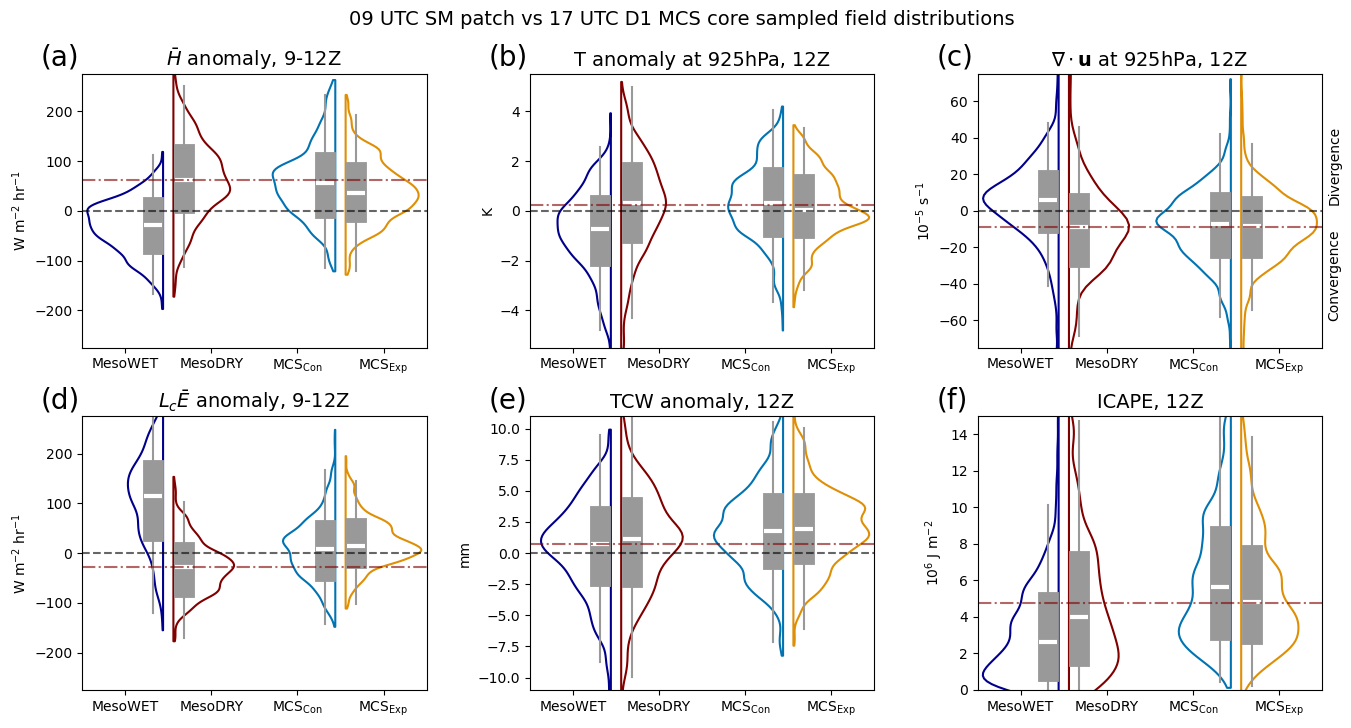

In [35]:
fig,axes = plt.subplots(2,3,figsize=(16,8),gridspec_kw={"hspace":0.25,"wspace":0.3})

units=["W m$^{-2}$ hr$^{-1}$","K",r"10$^{-5}$ s$^{-1}$","W m$^{-2}$ hr$^{-1}$","mm","10$^6$ J m$^{-2}$"]#"K"],
facts=[1/4,1,10e5,1/4,1,10e-6]#1000
names=[r"$\bar H$ anomaly, 9-12Z","T anomaly at 925hPa, 12Z",r"$\nabla\cdot\mathbf{u}$ at 925hPa, 12Z",
       r"$L_c \bar E$ anomaly, 9-12Z",r"TCW anomaly, 12Z","ICAPE, 12Z"]# r"$q$ anomaly at 925hPa, 12Z",r"$\frac{1}{g}\int_p {\rm CAPE}(p)$, 12Z"

for i, var in enumerate(["sh_accum","t925","div925","lh_accum","tcw","ICAPE"]):#"q925"
    ax=axes.flatten()[i]

    a=(con_tabD.loc[:,[var]]*facts[i]).dropna()
    a["type"]="MesoDRY"
    #a["label"]="DRY"
    b=(con_tabW.loc[:,[var]]*facts[i]).dropna()
    b["type"]="MesoWET"
    #b["label"]="WET"
    c=(con_mcs_tab.loc[:,[var]]*facts[i]).dropna()
    c["type"]=r"MCS$_{\rm Con}$"
    #c["label"]="Control"
    d=(pd.concat([wg_mcs_tab,LO_mcs_tab]).loc[:,[var]]*facts[i]).dropna()#
    d["type"]=r"MCS$_{\rm Exp}$"
    #d["label"]="SM(L+S)"
    df=pd.concat([b,a,c,d])

    sns.violinplot(ax=ax,data=df,x="type",y=var,split=True,inner_kws=dict(box_width=15, whis_width=1.5, color=".6"),bw_adjust=0.75,cut=0.5,
               fill=False,gap=-0.1,palette={"MesoDRY":"maroon","MesoWET":"darkblue",r"MCS$_{\rm Con}$":hues[0],r"MCS$_{\rm Exp}$":hues[1]},legend=False,common_norm=True)
    if i<5:
        ax.axhline(0,color="k",ls="--",alpha=0.6)
    ax.axhline(a[var].mean(),color="maroon",ls="-.",alpha=0.6)
    ax.set_ylabel(units[i])
    ax.set_title(names[i],fontsize=14)
    ax.set_xlabel("")
    ax.text(-0.12,1.03,"("+string.ascii_lowercase[i]+")",fontsize=20,transform=ax.transAxes)
axes[0,0].set_ylim([-275,275])
axes[0,1].set_ylim([-5.5,5.5])
axes[0,2].set_ylim([-75,75])
axes[1,0].set_ylim([-275,275])
axes[1,1].set_ylim([-11,11])
axes[1,2].set_ylim([0,15])

axes[0,2].text(3.56,25,"Divergence",fontsize=10,rotation="vertical",verticalalignment="center")
axes[0,2].text(3.56,-35,"Convergence",fontsize=10,rotation="vertical",verticalalignment="center")
"""
legend_elements = [Line2D([],[],color="maroon", ls="--", marker="o", label='SM DRY'),
                   Line2D([],[],color="darkblue", marker="o", label='SM WET'),
                   Line2D([],[],color=hues[0], marker="", label='Control MCSs'),
                   Line2D([],[],color=hues[1], marker="", label='SM(Large+Small) MCSs')]
#fig.subplots_adjust(bottom=0.2)
fig.legend(handles=legend_elements, fontsize='11', ncol=4, loc="lower center")
"""
fig.suptitle("09 UTC SM patch vs 17 UTC D1 MCS core sampled field distributions",fontsize=14,y=0.96)
fig.savefig("Paper_figs/Pdf_sampling.png",dpi=200,bbox_inches="tight",facecolor="white")

In [36]:
(pd.concat([wg_mcs_tab,LO_mcs_tab])["lh_accum"].median() - con_mcs_tab["lh_accum"].median())/con_mcs_tab["lh_accum"].median()

np.float64(0.6881652911803556)

In [37]:
(con_tabW["lh_accum"].median() - con_mcs_tab["lh_accum"].median())/con_tabW["lh_accum"].median()

np.float64(0.9234002752426992)

In [38]:
pd.concat([wg_mcs_tab,LO_mcs_tab])["lh_accum"].median(), con_mcs_tab["lh_accum"].median()

(np.float64(59.84094157902644), np.float64(35.44732372573896))

In [39]:
(con_tabD["ICAPE"].median() - con_tabW["ICAPE"].median())/con_tabD["lh_accum"].median()

np.float64(-1213.572692873308)

In [40]:
con_tabD["ICAPE"].median()/con_tabW["ICAPE"].median()

np.float64(1.5336204159650433)

FIGURE 4

In [41]:
def flux_lat_sections(sim_day,d2=False):
    sim_day=str(sim_day)
    tstrs=["Control D"+sim_day,"SM(LargeOnly) D"+sim_day,"SM(L+S) D"+sim_day]
    labs=[r"$\bar H$",r"$L_c\bar E$",r"$\rm\overline{SW}_{\,sfc}^{\,net}$","09Z SM"]#,r"$\overline{EF}$"]
    colors=["steelblue","goldenrod","darkgreen","purple","maroon"]
    meandim="longitude"
    hr=12
    
    
    fig,axes=plt.subplots(1,3,figsize=(16,4.5),gridspec_kw={"wspace":0.2})
    
    for i, sim in enumerate(["Control_48hr_runs_D"+sim_day,"Large_only_D"+sim_day,"Wg_mcs_D"+sim_day]):
        flux_accums=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/{}_17zMCS_hfx_accums_filt_core_12z_composites.nc".format(sim,hr))
    
        if meandim=="longitude":
            dimlab="meridional"
        elif meandim=="latitude":
            dimlab="zonal"  
        
       # for i, var in enumerate(list(flux_accums.data_vars)[:-1]):
       #     if "anom" in var:
        (flux_accums["shfx_anom"]/4).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[i],label=labs[0],color=colors[0])
        (flux_accums["lhfx_anom"]/4).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[i],label=labs[1],color=colors[1])
        (flux_accums["sw_nsfc_anom"]/4).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[i],label=labs[2],color=colors[2])
        ax1=axes[i].twinx()
        flux_accums.pre_sm_anom.sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=ax1,color=colors[3])
        #ax2=axes[i].twinx()
        #ef=flux_accums.lhfx/flux_accums.ae - (flux_accums.lhfx-flux_accums.lhfx_anom)/(
        #        flux_accums.ae-flux_accums.ae_anom)
        #(ef).sel({meandim:slice(-75,75)}).mean(dim=meandim).coarsen(latitude=7,boundary="trim").mean().plot(ax=ax2,label=labs[4],color=colors[4])
    
        if d2==True:
            sm=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/{}_17zMCS_hfx_accums_filt_core_12z_composites.nc".format(sim.replace("D2","D1"),hr)).pre_sm_anom
            sm.sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=ax1,label="D1",color=colors[3],ls="--")
            ax1.legend(loc="lower right")
        axes[i].set_xlim([-600,600])
        axes[i].set_xlabel(dimlab.capitalize()+" distance (km)",fontsize=12)
        axes[i].set_ylim([-40,40])
        axes[i].set_ylabel(r"Flux anomalies (W m$^{-2}$ hr$^{-1}$)",fontsize=12)
        ax1.set_ylabel(r"SM anomaly (kg m$^{-2}$)",fontsize=12)
        ax1.set_ylim([-2.5,2.5])
        """
        if i==2:
            ax2.spines['right'].set_position(('outward', 60))
        else:
            ax2.axis("off")
        ax2.set_ylim([-0.25,0.25])
        ax2.set_ylabel("EF anomaly",fontsize=12)
        """
        axes[i].axhline(y=0,color="k",alpha=0.6)
        axes[i].axvline(x=0,color="maroon",alpha=0.6,ls="--")
        axes[i].set_title(tstrs[i]+" (n=%03d)"%flux_accums.attrs["number_cores"],fontsize=15)
        axes[i].set_box_aspect(1.1)
        axes[i].text(-900, 44, "("+string.ascii_lowercase[i]+")", fontsize=24)
        
    legend_elements = [Line2D([],[],color=colors[i],marker="",label=labs[i]) for i in range(len(labs))]
    fig.subplots_adjust(bottom=0.22)
    fig.legend(handles=legend_elements, fontsize='12', ncol=5, loc="lower center")#, bbox_to_anchor=(0.65,-0.2)
    #axes[0].set_title(sim)
    
    #fig.suptitle("Mean 09-12Z fluxes, 17Z MCS core locations",fontsize=18,y=1.03)
    #fig.text(0.09,0.98,"a)",fontsize=28)
    #fig.text(0.12,0.983,"Mean 09-12Z fluxes, 17Z MCS core locations",fontsize=22)
    
    fig.savefig("Paper_figs/MCS_lat_sections_12Z.png",dpi=250,bbox_inches="tight",facecolor="white")

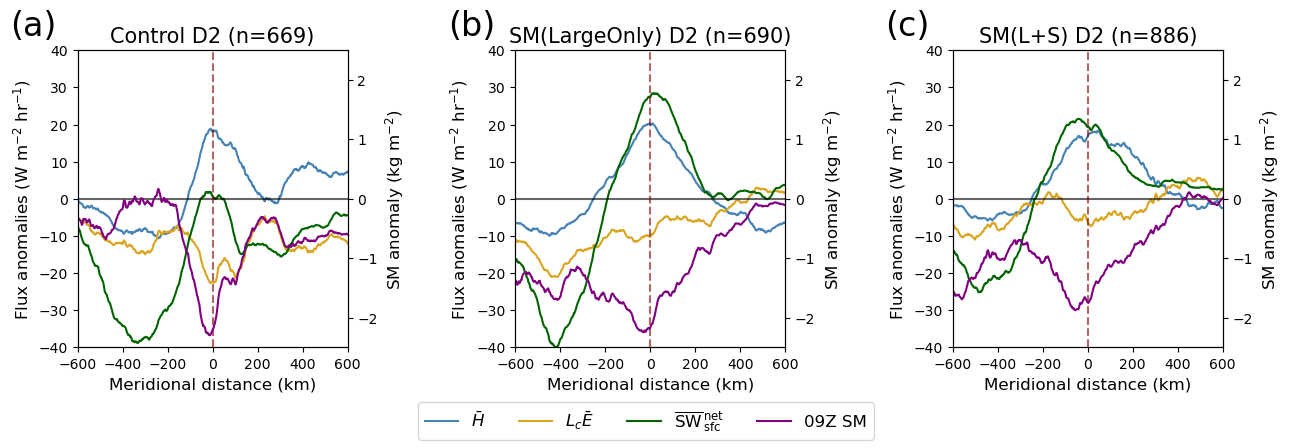

In [42]:
flux_lat_sections(2,d2=False)

In [43]:
def mcs_hmoeller(sim,panels=3,lab="",save=False,lab_offst=0,supp=False):
    blfields=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/{}_17zMCS_2dfields_filt_core_hmoeller.nc".format(sim))
    hfxs=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/{}_17zMCS_hfxs_filt_core_hmoeller.nc".format(sim))

    if sim[:-1]=="Control_48hr_runs_D":
        name="Control D"+sim[-1]+" MCSs"
    elif sim[:-1]=="Wg_mcs_D":
        name="SM(Large+Small) D"+sim[-1]+" MCSs"
    elif sim[:-1]=="Large_only_D":
        name="SM(LargeOnly) D"+sim[-1]+" MCSs"
    
    fig,axes=plt.subplots(1,panels,figsize=(6.5*panels,4.5),gridspec_kw={"wspace":0.2,"hspace":0.3})
    axes=axes.flatten()
    
    if panels==4:
        (hfxs.shfx_anom).plot.contourf(ax=axes[0],levels=np.arange(-40,41,5),extend="both",cbar_kwargs={"label":"W m$^{-2}$"})
        Cs=blfields.sm_anom.coarsen(latitude=5,boundary="trim").mean().plot.contour(ax=axes[0],levels=np.arange(-2,3),colors="Black",alpha=0.6)
        axes[0].clabel(Cs)
        axes[0].set_title("$H$ and SM anomalies")
    
    (hfxs.sw_nsfc_anom).plot.contourf(ax=axes[panels%3],levels=np.arange(-60,65,10),extend="both",cbar_kwargs={"label":"SW (W m$^{-2})$"})
    Cs=(100*blfields.tcc_anom).coarsen(latitude=5,boundary="trim").mean().plot.contour(ax=axes[panels%3],levels=np.arange(-100,100,5),colors="Black",alpha=0.6)
    #Cs=(hfxs.shfx_anom).coarsen(latitude=5,boundary="trim").mean().plot.contour(ax=axes[panels%3],levels=np.arange(-24,24,8),colors="Purple",alpha=0.6)
    axes[panels%3].clabel(Cs)
    axes[panels%3].set_title(r"$\rm SW_{sfc}^{net}$ & TCC anoms",fontsize=18)
    axes[0].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"TCC (%)")], 
                   fontsize='11', bbox_to_anchor=(0.93,-0.115), frameon=False ,loc="center")
    
    blfields.t925_anom.plot.contourf(ax=axes[panels%3+1],levels=np.arange(-0.8,0.9,0.1),extend="both",cbar_kwargs={"label":"T (K)"})
    blfields.td925.plot.contour(ax=axes[panels%3+1],levels=[13],colors="Black",linewidths=3)
    Cs=blfields.pblh_anom.plot.contour(ax=axes[panels%3+1],levels=np.arange(-150,175,50),colors="Black",alpha=0.6)
    axes[panels%3+1].clabel(Cs)
    axes[panels%3+1].set_title("T$_{925}$ and $z_{PBL}$ anoms",fontsize=18)
    axes[1].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$z_{\rm PBL}$ (m)")], 
                   fontsize='11', bbox_to_anchor=(0.93,-0.115), frameon=False ,loc="center")
    
    (1000*blfields.q925_anom).plot.contourf(ax=axes[2],levels=np.arange(-0.8,0.9,0.1),cmap="BrBG",extend="both",cbar_kwargs={"label":"q (g kg$^{-1}$)"})
    #(1000*blfields.q925_anom).plot.contourf(ax=axes[panels%3+2],levels=np.arange(-0.6,0.61,0.1),cmap="BrBG",extend="both",cbar_kwargs={"label":"$q$ (g kg$^{-1}$)"})
    Cte=blfields.theta_e925_anom.plot.contour(ax=axes[panels%3+2],levels=np.arange(-2,3,0.4),colors="Black",alpha=0.6)
    axes[panels%3+2].clabel(Cte)
    axes[panels%3+2].set_title(r"$q_{925}$ and $\theta_e^{925}$ anoms",fontsize=18)
    axes[2].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$\theta_e$ (K)")], 
                   fontsize='11', bbox_to_anchor=(0.93,-0.115), frameon=False ,loc="center")
    
    for i, ax in enumerate(axes):
        ax.set_ylabel("")
        ax.set_xlabel("Hour",fontsize=14)
        ax.set_xticks(np.arange(-18,18,6))
        ax.set_yticks(np.arange(-400,500,200))
        ax.set_yticklabels(np.arange(-400,500,200),fontsize=12)
        ax.set_xticklabels(["%02dZ"%(i%24) for i in np.arange(-18,18,6)],fontsize=12)
        ax.set_xlim([-15,17])
        ax.axhline(0,color="maroon",ls="--")
        ax.axvline(7,color="maroon",ls="-.")
        #ax.scatter(-12,0,s=60,color="maroon")
        #ax.scatter(12,0,s=60,color="maroon")
        ax.scatter(17,0,s=60,color="maroon")
        ax.text(-20,630,"("+string.ascii_lowercase[i+lab_offst]+")",fontsize=24)
    axes[0].set_ylabel("Latitudinal distance (km)",fontsize=14)
    
    #fig.text(0.08,0.98,lab,fontsize=28)
    #fig.text(0.105,0.983,name,fontsize=22)
    if save:
        if supp:
            fig.savefig("Paper_figs/SuppFig_{}_MCS_hmoeller.png".format(sim),dpi=200,bbox_inches="tight",facecolor="white")
        else:
            fig.savefig("Paper_figs/{}_MCS_hmoeller.png".format(sim),dpi=200,bbox_inches="tight",facecolor="white")

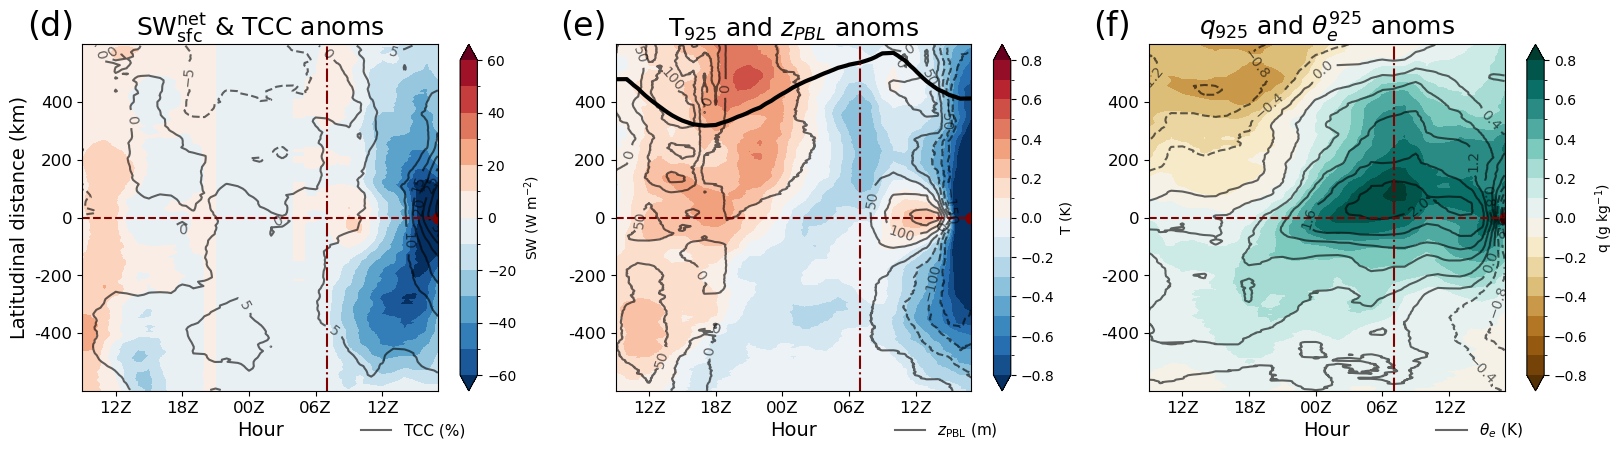

In [44]:
mcs_hmoeller("Control_48hr_runs_D2",lab_offst=3,save=True)

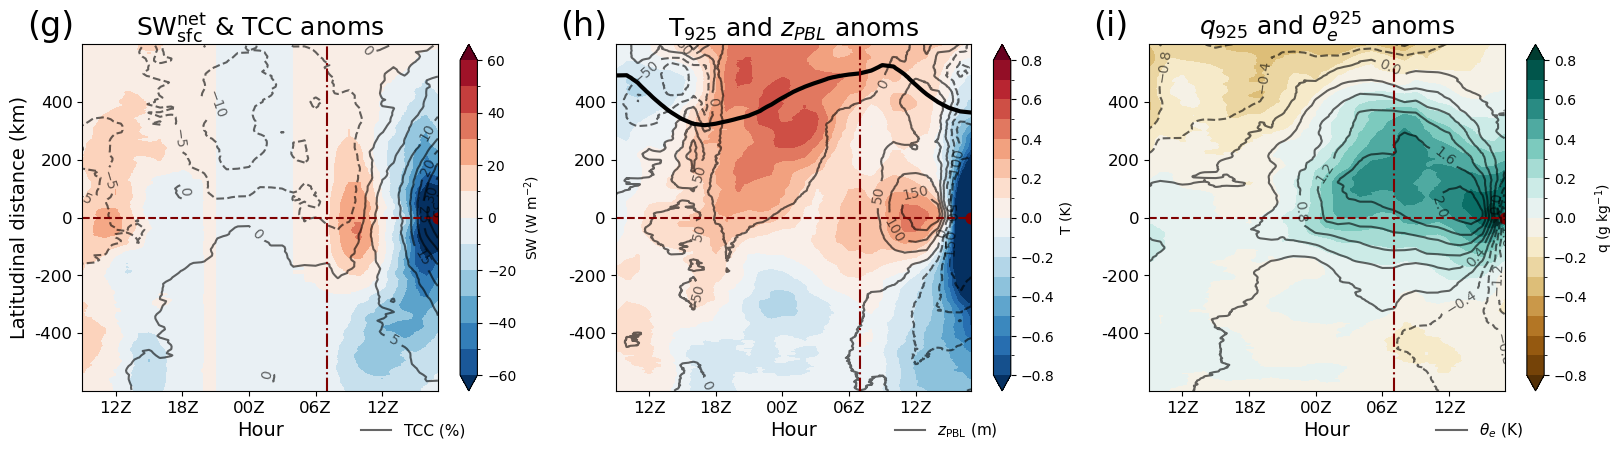

In [45]:
mcs_hmoeller("Wg_mcs_D2",lab_offst=6,save=True)

SUPPLEMENTARY

In [46]:
# FIG S1

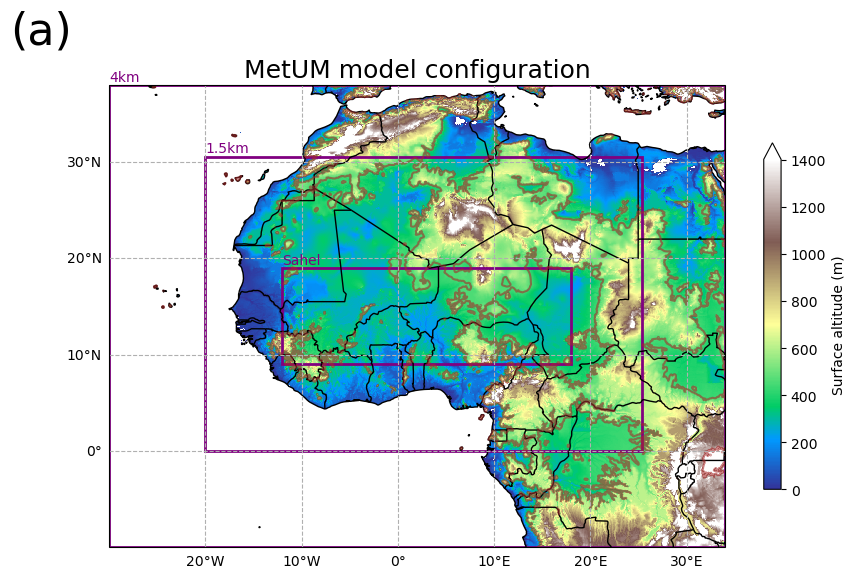

In [47]:
fig, ax = plt.subplots(figsize=(10,6),subplot_kw=dict(projection=ccrs.PlateCarree()))

orog=xr.DataArray.from_iris(iris.load("/gws/nopw/j04/lmcs/hburns/Test_run/ancils/qrparm.orog")[9])
orog.where(orog>0).plot(ax=ax,robust=True,vmin=0,cmap="terrain",cbar_kwargs={"label":"Surface altitude (m)","shrink":0.75})
orog.plot.contour(ax=ax,levels=[450],colors="Brown",alpha=0.6)
ax.set_title("MetUM model configuration",fontsize=18)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
gl = ax.gridlines(crs = ccrs.PlateCarree(),draw_labels=True,linestyle="--")
gl.top_labels = False
gl.right_labels = False
#gl.ylocator = mticker.FixedLocator([5,10,15,20])
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
ax.add_patch(mpatch.Rectangle((330,-10),64,48,fill=False,edgecolor="purple",lw=2,transform=ccrs.PlateCarree()))
ax.text(330,38.4,"4km",color="purple",transform=ccrs.PlateCarree())
ax.add_patch(mpatch.Rectangle((340,0),45.4,30.5,fill=False,edgecolor="purple",lw=2,transform=ccrs.PlateCarree()))
ax.text(340,31,"1.5km",color="purple",transform=ccrs.PlateCarree())
ax.add_patch(mpatch.Rectangle((348,9),30,10,fill=False,edgecolor="purple",lw=2,transform=ccrs.PlateCarree()))
ax.text(348,19.4,"Sahel",color="purple",transform=ccrs.PlateCarree())
#ax.set_facecolor("lightgrey")

fig.text(0.03,0.95,"(a)",fontsize=32)
fig.savefig("Paper_figs/SuppFig_model_domain.png",dpi=250,bbox_inches="tight",facecolor="white")

In [48]:
wObj = wclass.landwav('SM1p5km_control')
scales = wObj.scales

In [49]:
def power_diffs_evolution(var,expt="wg_mcs",method="ratio"):
    hrs=np.concatenate([[7],np.arange(9,55,3)])
    if expt=="wg_mcs":
        sim="SM(Large+Small)"
    else:
        sim="SM(LargeOnly)"
    sm_diffs,var_diffs=[],[]

    for hour in hrs:
        #if expt=="wg_mcs":
        #    sens_df = pd.concat([pd.read_csv("~/LMCS/LMCS_Wafrica_sim/field_scales/Wavelet_power_spectra/Sahel_%s_hr%s-%i.csv"%(expt,hour,i)) for i in [0,1,2,3]],axis=1)
        #else:
        sens_df = pd.read_csv("~/LMCS/LMCS_Wafrica_sim/field_scales/Wavelet_power_spectra/Sahel_{}_hr{}.csv".format(expt,hour))
        
        con_df = pd.read_csv("~/LMCS/LMCS_Wafrica_sim/field_scales/Wavelet_power_spectra/Sahel_control_48hr_runs_hr%s.csv"%hour)
        #if hour>24:
        sens_df=sens_df/sens_df.sum(axis=0)
        con_df=con_df/con_df.sum(axis=0)

        sens_names=set(sens_df.columns)
        con_names=set(con_df.columns)
        common=list(sens_names.intersection(con_names))
        #for i in common:
        #    if "20060730" in i:
        #        common.remove(i)
        if hour==7:
            for i in common:
                if "20060730_sm" in i:
                    common.remove(i)
        elif hour==30:
            for i in common:
                if "20060730_"+var in i:
                    common.remove(i)
        sens_df=sens_df[common]
        con_df=con_df[common]
        #else:
        #    sens_df=sens_df/sens_df.sum(axis=0)

        if method=="ratio":
            sm_diffs.append(sens_df.filter(regex="sm").mean(axis=1) / con_df.filter(regex="sm").mean(axis=1))
            var_diffs.append(sens_df.filter(regex=var).mean(axis=1) / con_df.filter(regex=var).mean(axis=1))
            var_name="Log10(Ratio), wavelet power contrib."
        elif method=="diff":
            sm_diffs.append(sens_df.filter(regex="sm").mean(axis=1) - con_df.filter(regex="sm").mean(axis=1))
            var_diffs.append(sens_df.filter(regex=var).mean(axis=1) - con_df.filter(regex=var).mean(axis=1))
            var_name="Difference, % wavelet power contrib."

    var_diffs=xr.DataArray(pd.concat(var_diffs,axis=1).values,coords=[scales,hrs-6],dims=["Scale (km)","Hour post init"],name=var_name)

    if var in ["shfx","sw_nsfc","toaswr"]:
        for i in [0,6,7,14,15]:
            try:
                var_diffs[:,i]=0
            except:
                continue

    return var_diffs

In [50]:
wg_sm_spectra=power_diffs_evolution("sm")
lo_sm_spectra=power_diffs_evolution("sm",expt="large_only")
wg_sw_spectra=power_diffs_evolution("sw_nsfc")
lo_sw_spectra=power_diffs_evolution("sw_nsfc",expt="large_only")
wg_lcc_spectra=power_diffs_evolution("shfx")
lo_lcc_spectra=power_diffs_evolution("shfx",expt="large_only")

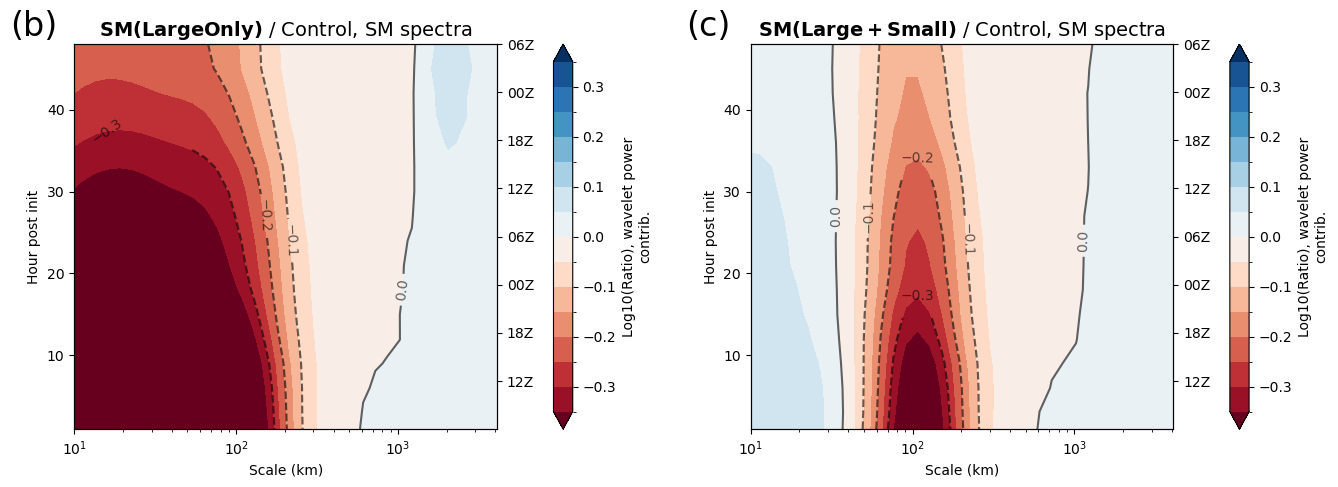

In [51]:
var="sm"
if var in ["shfx","lhfx","sm"]:
    vmax=0.35
else:
    vmax=0.175
hrs=np.concatenate([[7],np.arange(9,55,3)])

fig,axes=plt.subplots(1,2,figsize=(16,5))
np.log10(lo_sm_spectra[1:,:]).T.plot.contourf(ax=axes[0],levels=15,cmap="RdBu",robust=True,cbar_kwargs={'pad': 0.1},vmax=vmax,extend="both")
Csm=np.log10(lo_sm_spectra[1:,:]).T.plot.contour(ax=axes[0],colors="Black",levels=np.arange(-0.3,0.4,0.1),alpha=0.6,kwargs=dict(inline=True))#cmap="PRGn_r",levels=np.arange(0.6,1.6,0.2)
axes[0].clabel(Csm)
axes[0].set_title(r"$\bf SM(LargeOnly)$ / Control, SM spectra",fontsize=14)
axes[0].text(4,49,"(b)",fontsize=24)

np.log10(wg_sm_spectra[1:,:]).T.plot.contourf(ax=axes[1],levels=15,cmap="RdBu",robust=True,cbar_kwargs={'pad': 0.1},vmax=vmax,extend="both")
Csm=np.log10(wg_sm_spectra[1:,:]).T.plot.contour(ax=axes[1],colors="Black",levels=np.arange(-0.3,0.4,0.1),alpha=0.6,kwargs=dict(inline=True))#cmap="PRGn_r",levels=np.arange(0.6,1.6,0.2)
axes[1].clabel(Csm)
axes[1].set_title(r"$\bf SM(Large+Small)$ / Control, SM spectra",fontsize=14)
axes[1].text(4,49,"(c)",fontsize=24)

for ax in axes:
    ax.set_xscale("log")
    #ax.axhline(25,color="green",ls="--",alpha=0.8)
    ax.set_xlim([10,None])
    #ax.set_yticks(np.arange(0,48,3))
    ax1=ax.twinx()
    ax1.set_yticks(np.arange(6,hrs[-1]-5,6)) # full ->50
    ax1.set_yticklabels(#["06Z"]+
        ["%02dZ"%hr for hr in hrs%24][2::2])

fig.savefig("Paper_figs/SuppFig_SM_power_spectra.png",dpi=250,bbox_inches="tight",facecolor="white")

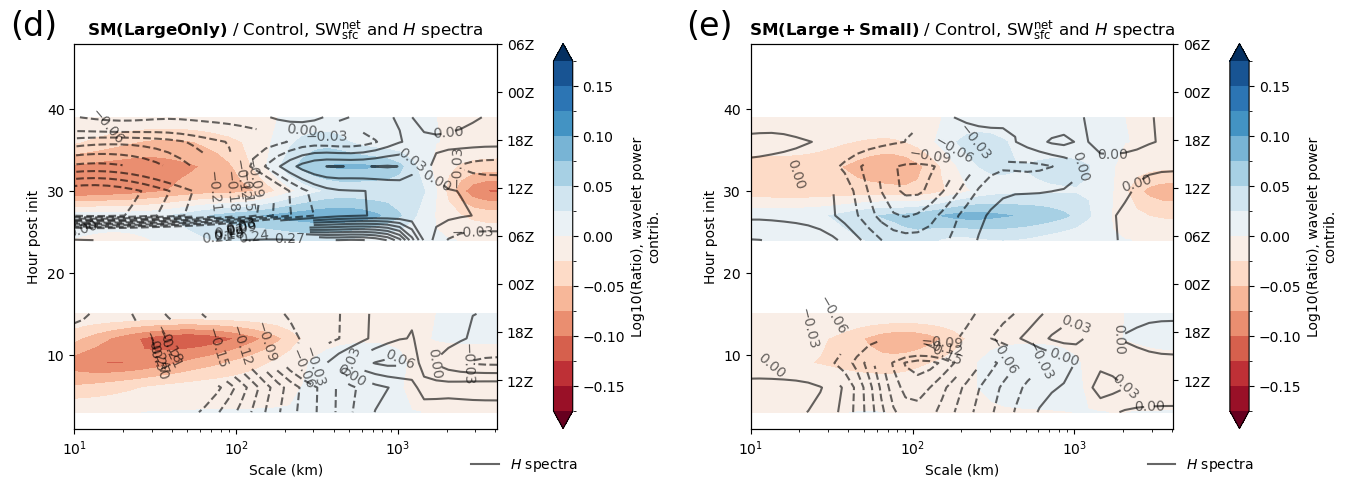

In [52]:
var="sw_nsfc"
if var in ["shfx","lhfx","sm"]:
    vmax=0.35
else:
    vmax=0.175
hrs=np.concatenate([[7],np.arange(9,55,3)])

fig,axes=plt.subplots(1,2,figsize=(16,5))
np.log10(lo_sw_spectra[1:,:]).T.plot.contourf(ax=axes[0],levels=15,cmap="RdBu",robust=True,cbar_kwargs={'pad': 0.1},vmax=vmax,extend="both")
Csm=np.log10(lo_lcc_spectra[1:,:]).T.plot.contour(ax=axes[0],colors="Black",levels=np.arange(-0.3,0.4,0.03),alpha=0.6,kwargs=dict(inline=True))#cmap="PRGn_r",levels=np.arange(0.6,1.6,0.2)
axes[0].clabel(Csm)
axes[0].set_title(r"$\bf SM(LargeOnly)$ / Control, $\rm SW^{\rm net}_{\rm sfc}$ and $H$ spectra")
axes[0].text(4,49,"(d)",fontsize=24)

np.log10(wg_sw_spectra[1:,:]).T.plot.contourf(ax=axes[1],levels=15,cmap="RdBu",robust=True,cbar_kwargs={'pad': 0.1},vmax=vmax,extend="both")
Csm=np.log10(wg_lcc_spectra[1:,:]).T.plot.contour(ax=axes[1],colors="Black",levels=np.arange(-0.3,0.4,0.03),alpha=0.6,kwargs=dict(inline=True))#cmap="PRGn_r",levels=np.arange(0.6,1.6,0.2)
axes[1].clabel(Csm)
axes[1].set_title(r"$\bf SM(Large+Small)$ / Control, $\rm SW^{\rm net}_{\rm sfc}$ and $H$ spectra")
axes[1].text(4,49,"(e)",fontsize=24)

for ax in axes:
    ax.set_xscale("log")
    #ax.axhline(25,color="green",ls="--",alpha=0.8)
    ax.set_xlim([10,None])
    #ax.set_yticks(np.arange(0,48,3))
    ax1=ax.twinx()
    ax1.set_yticks(np.arange(6,hrs[-1]-5,6)) # full ->50
    ax1.set_yticklabels(#["06Z"]+
        ["%02dZ"%hr for hr in hrs%24][2::2])
    ax.legend(handles=[Line2D([],[], color="k", alpha=0.6, label="$H$ spectra")],
              fontsize='10', bbox_to_anchor=(1.22,-0.04), frameon=False)

fig.savefig("Paper_figs/SuppFig_ratio_flux_power_spectra.png",dpi=250,bbox_inches="tight",facecolor="white")

In [53]:
# FIG S2

In [54]:
def zonal_section(var,unit,hr=None,rstr="",days=2):
    stash=var
    if var not in ["td925"]:
        try:
            plev=int(var[-3:])
            stash=var[0]+"_plevs"
        except:
            pass

    if len(rstr)!=0:
        rstr="_"+rstr

    if hr==None:
        hr=slice(0,23)
        
    #if var=="shfx":
    #    con=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Control_run_mean_{}_1p5km.nc".format(var))[stash_dict["shfx_con"]].sel(
    #        latitude=slice(4,25),longitude=slice(345,385),hour=hr).mean(dim=["longitude","hour"]) 
    #else:
    con=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Control_48hr_runs_D1{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
            latitude=slice(4,25),longitude=slice(345,385),hour=hr).mean(dim=["longitude","hour"])        
    wg=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Wg_mcs_D1{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
        latitude=slice(4,25),longitude=slice(345,385),hour=hr).mean(dim=["longitude","hour"])        
    LO=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Large_only_D1{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
        latitude=slice(4,25),longitude=slice(345,385),hour=hr).mean(dim=["longitude","hour"])                         
    if days==2:
        con2=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Control_48hr_runs_D2{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
            latitude=slice(4,25),longitude=slice(345,385),hour=hr).mean(dim=["longitude","hour"])   
        LO2=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Large_only_D2{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
            latitude=slice(4,25),longitude=slice(345,385)).mean(dim=["longitude","hour"])       
        wg2=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/mean_states/Wg_mcs_D2{}_mean_{}_1p5km.nc".format(rstr,var))[stash_dict[stash]].sel(
            latitude=slice(4,25),longitude=slice(345,385),hour=hr).mean(dim=["longitude","hour"])

    fact=1
    if var=="precip":
        fact=3600
    elif var=="tcc":
        fact=100
    elif "q" in var and "g" in unit:
        fact=1000

    D1=pd.concat([fact*con.to_series().rename("Control"),fact*wg.to_series().rename("SM(Large+Small"),fact*LO.to_series().rename("SM(LargeOnly)")],axis=1)
    D2=pd.concat([fact*con2.to_series().rename("Control"),fact*wg2.to_series().rename("SM(Large+Small"),fact*LO2.to_series().rename("SM(LargeOnly)")],axis=1)
    
    return D1, D2


In [55]:
meanSM=zonal_section("sm","kg m$^{-2}$",days=2)
meanP=zonal_section("precip","kg m$^{-2}$",days=2)

In [56]:
meanSH=zonal_section("shfx","kg m$^{-2}$",days=2)
meanLH=zonal_section("lhfx","kg m$^{-2}$",days=2)

In [57]:
dc_u650=diurnal_cycle("u650","")
dc_tcc=diurnal_cycle("tcc","")

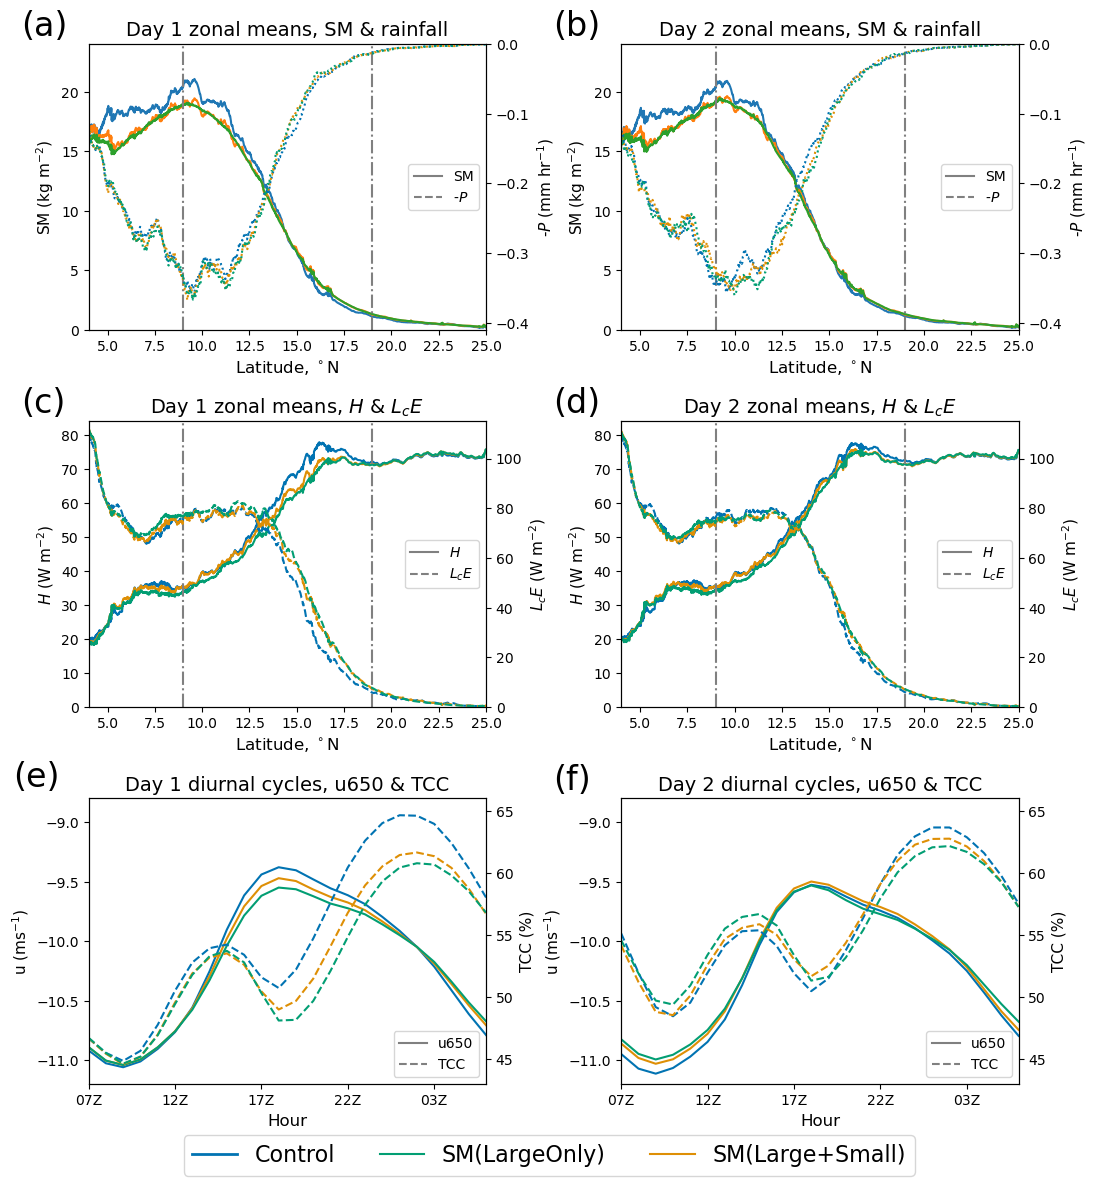

In [58]:
fig,axes=plt.subplots(3,2,figsize=(12,13),gridspec_kw={"wspace":0.34,"hspace":0.32})
axes=axes.flatten()

for i, ax in enumerate(axes[:2]):
    meanSM[i].plot(ax=ax)
    ax1=ax.twinx()
    (-1*meanP[i]).plot(ax=ax1,ls=":",color=hues)
    ax.set_xlim([4,25])
    ax.set_xlabel(r"Latitude, $^\circ$N",fontsize=12)
    ax.set_ylim([0,24])
    ax.get_legend().remove()
    ax1.set_ylim([-0.41,0])
    ax1.set_yticks(np.arange(-0.4,0.1,0.1))
    ax1.get_legend().remove()
    ax.set_title("Day %s zonal means, SM & rainfall"%str(i+1),fontsize=14)
    legend_elements = [Line2D([],[],color="grey", marker="", label="SM"),
                       Line2D([],[],color="grey", ls="--", marker="", label="-$P$")]
    ax.legend(handles=legend_elements,loc="center right")
    ax.axvline(9,color="grey",ls="-.")
    ax.axvline(19,color="grey",ls="-.")
    ax.set_ylabel("SM (kg m$^{-2}$)",fontsize=11)
    ax1.set_ylabel("-$P$ (mm hr$^{-1}$)",fontsize=11)
axes[0].text(-0.17,1.03,"(a)", fontsize=24,transform=axes[0].transAxes)
axes[1].text(-0.17,1.03,"(b)", fontsize=24,transform=axes[1].transAxes)

for i, ax in enumerate(axes[2:4]):
    meanSH[i].plot(ax=ax,color=hues)
    ax1=ax.twinx()
    meanLH[i].plot(ax=ax1,ls="--",color=hues)
    ax.set_xlim([4,25])
    ax.set_xlabel(r"Latitude, $^\circ$N",fontsize=12)
    ax.set_ylim([0,84])
    ax.get_legend().remove()
    ax1.get_legend().remove()
    ax1.set_ylim([0,115])
    ax.set_title("Day %s zonal means, $H$ & $L_cE$"%str(i+1),fontsize=14)
    legend_elements = [Line2D([],[],color="grey", marker="", label="$H$"),
                       Line2D([],[],color="grey", ls="--", marker="", label="$L_cE$")]
    ax.legend(handles=legend_elements,loc="center right")
    ax.axvline(9,color="grey",ls="-.")
    ax.axvline(19,color="grey",ls="-.")
    ax.set_ylabel("$H$ (W m$^{-2}$)",fontsize=11)
    ax1.set_ylabel("$L_cE$ (W m$^{-2}$)",fontsize=11)
axes[2].text(-0.17,1.03,"(c)", fontsize=24,transform=axes[2].transAxes)
axes[3].text(-0.17,1.03,"(d)", fontsize=24,transform=axes[3].transAxes)

for i, ax in enumerate(axes[4:]):
    dc_u650[i].plot(ax=ax,color=hues)
    ax1=ax.twinx()
    dc_tcc[i].plot(ax=ax1,ls="--",color=hues)
    ax.set_xlim([0,23])
    ax.set_xlabel(r"Hour",fontsize=12)
    ax.set_ylim([-11.2,-8.8])
    ax.get_legend().remove()
    ax1.get_legend().remove()
    ax1.set_ylim([43,66])
    ax.set_title("Day %s diurnal cycles, u650 & TCC"%str(i+1),fontsize=14)
    legend_elements = [Line2D([],[],color="grey", marker="", label="u650"),
                       Line2D([],[],color="grey", ls="--", marker="", label="TCC")]
    ax.legend(handles=legend_elements,loc="lower right")
    ax.set_ylabel("u (ms$^{-1}$)",fontsize=11)
    ax1.set_ylabel("TCC (%)",fontsize=11)
axes[4].text(-0.19,1.04,"(e)", fontsize=24,transform=axes[4].transAxes)
axes[5].text(-0.17,1.03,"(f)", fontsize=24,transform=axes[5].transAxes)

legend_elements = [Line2D([],[],color=hues[0], lw=2, marker="", label='Control'),
                   Line2D([],[],color=hues[2], marker="", label='SM(LargeOnly)'),
                   Line2D([],[],color=hues[1], marker="", label='SM(Large+Small)')]
fig.subplots_adjust(bottom=0.08)
fig.legend(handles=legend_elements, fontsize='16', ncol=3, loc="lower center")
fig.savefig("Paper_figs/SuppFig_mean_state.png",dpi=300,bbox_inches="tight",facecolor="white")

In [59]:
# FIG S3

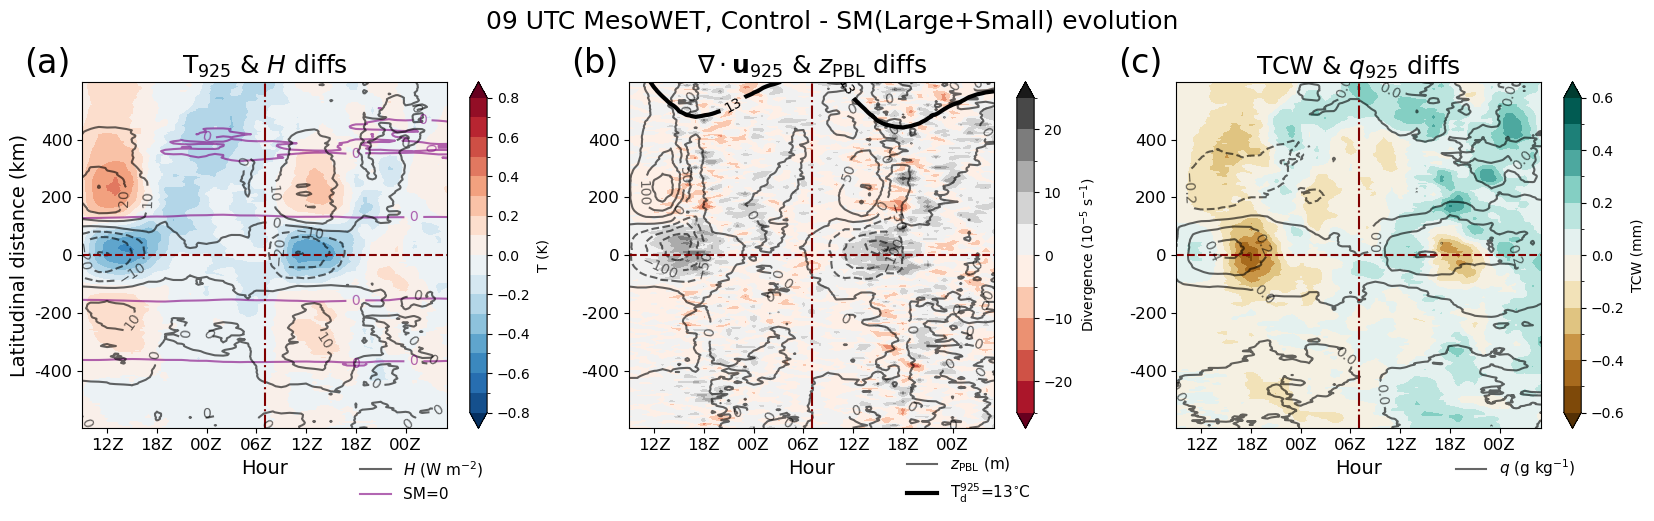

In [60]:
loc="diffPmaxWET"
blfields=(xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_2dfields_filt_{}_hmoeller.nc".format(loc)) - 
            xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_2dfields_filt_{}_hmoeller.nc".format(loc)))
hfxs=(xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_hfxs_filt_{}_hmoeller.nc".format(loc)) - 
            xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_hfxs_filt_{}_hmoeller.nc".format(loc)))

fig,axes=plt.subplots(1,3,figsize=(20,4.5),gridspec_kw={"wspace":0.2,"hspace":0.3})

blfields.t925.plot.contourf(ax=axes[0],levels=np.arange(-0.8,0.9,0.1),extend="both",cbar_kwargs={"label":"T (K)"})
#hfxs.shfx.plot.contourf(ax=axes[0],levels=np.arange(-40,41,5),extend="both",cbar_kwargs={"label":r"$\bar H$ (W m$^{-2}$)"})
Cs=blfields.sm.coarsen(latitude=3,boundary="trim").mean().plot.contour(ax=axes[0],levels=[0],colors="Purple",alpha=0.6)
Ch=hfxs.shfx.coarsen(latitude=3,boundary="trim").mean().plot.contour(ax=axes[0],levels=np.arange(-40,41,10),colors="Black",alpha=0.6)
axes[0].clabel(Ch)
axes[0].clabel(Cs)
axes[0].set_title(r"T$_{925}$ & $H$ diffs",fontsize=18)
axes[0].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$H$ (W m$^{-2}$)"),
                        Line2D([],[], color="purple", alpha=0.6, label=r"SM=0")], 
               fontsize='11', bbox_to_anchor=(0.93,-0.15), frameon=False ,loc="center")

(10e5*blfields.horizontal_divergence).coarsen(latitude=5,boundary="trim").mean().plot.contourf(
                ax=axes[1],cmap="RdGy",levels=np.arange(-25,30,5),extend="both",cbar_kwargs={"label":r"Divergence (10$^{-5}$ s$^{-1}$)"})
#Cs=(-1*blfields.ushear650_925_anom).coarsen(latitude=3,boundary="trim").mean().plot.contour(
#                                                        ax=axes[1],levels=np.arange(-1.5,3,0.5),colors="Black",alpha=0.6)
Cs=blfields.pblh_anom.coarsen(latitude=3,boundary="trim").mean().plot.contour(ax=axes[1],levels=np.arange(-150,175,50),colors="Black",alpha=0.6)
Ct=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_2dfields_filt_{}_hmoeller.nc".format(loc)
               ).td925.plot.contour(ax=axes[1],levels=[13],colors="Black",linewidths=3)
axes[1].clabel(Cs)
axes[1].clabel(Ct)
axes[1].set_title(r"$\nabla\cdot\mathbf{u}_{925}$ & $z_{\rm PBL}$ diffs",fontsize=18)
axes[1].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$z_{\rm PBL}$ (m)"), 
                        Line2D([],[], color="k", lw=3 , label=r"$\rm T_d^{925}$=13$\!^\circ\!$C")], 
               fontsize='11', bbox_to_anchor=(0.93,-0.15), frameon=False ,loc="center")

(blfields.tcw).plot.contourf(ax=axes[2],levels=np.arange(-0.6,0.61,0.1),cmap="BrBG",extend="both",cbar_kwargs={"label":"TCW (mm)"})
Cte=(1000*blfields.q925).plot.contour(ax=axes[2],levels=np.arange(-0.6,0.61,0.2),colors="Black",alpha=0.6)
#Cte=blfields.theta_e925.coarsen(latitude=3,boundary="trim").mean().plot.contour(ax=axes[2],levels=np.arange(-2,3,0.4),colors="Black",alpha=0.6)
axes[2].clabel(Cte)
axes[2].set_title(r"TCW & $q_{925}$ diffs",fontsize=18)
axes[2].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$q$ (g kg$^{-1}$)")], 
               fontsize='11', bbox_to_anchor=(0.93,-0.115), frameon=False ,loc="center")

#labs=["a)","b)","c)"]
for i, ax in enumerate(axes):
    ax.set_ylabel("")
    ax.set_xlabel("Hour",fontsize=14)
    #ax.set_xticks(np.arange(9,31,3))
    #ax.set_xticklabels(["%02dZ"%(i%24) for i in np.arange(9,31,3)])
    ax.set_xlim([9,53])
    ax.set_xticks(np.arange(12,54,6))
    ax.set_xticklabels(["%02dZ"%(i%24) for i in np.arange(12,54,6)],fontsize=12)
    ax.set_yticks(np.arange(-400,500,200))
    ax.set_yticklabels(np.arange(-400,500,200),fontsize=12)
    ax.axhline(0,color="maroon",ls="--")
    #ax.axvline(12,color="maroon",ls="--")
    ax.axvline(31,color="maroon",ls="-.")
    ax.text(2,630,"("+string.ascii_lowercase[i]+")",fontsize=24)
axes[0].set_ylabel("Latitudinal distance (km)",fontsize=14)

fig.suptitle("09 UTC MesoWET, Control - SM(Large+Small) evolution",fontsize=18,y=1.04)
#fig.text(0.08,0.92,"b)",fontsize=32)
fig.savefig("Paper_figs/SuppFig_SMwet_MCS_hmoeller.png",dpi=300,bbox_inches="tight",facecolor="white")

In [61]:
# FIG S4

In [62]:
def spatial_section_diffs(patch,hr,meandim="longitude",save=False,lab_offst=0):
    if patch.lower()=="dry":
        sgn=""
    else:
        sgn="WET"
    
    con_fluxes=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_hfx_accums_filt_diffPmax{}_12z_composites.nc".format(sgn,hr))
    sens_fluxes=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_hfx_accums_filt_diffPmax{}_12z_composites.nc".format(sgn,hr))
    con_2d=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_2dfields_filt_diffPmax{}_{}z_composites.nc".format(sgn,hr))
    sens_2d=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_2dfields_filt_diffPmax{}_{}z_composites.nc".format(sgn,hr))
    con_3d=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_3dfields_filt_diffPmax{}_{:02d}z_composites.nc".format(sgn,hr))
    sens_3d=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_3dfields_filt_diffPmax{}_{:02d}z_composites.nc".format(sgn,hr))
    #con_plevs=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D1_09zSM_plevs_filt_diffPmax{}_{:02d}z_composites.nc".format(sgn,hr))
    #sens_plevs=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Wg_mcs_D1_09zSM_plevs_filt_diffPmax{}_{:02d}z_composites.nc".format(sgn,hr))
    
    if meandim=="longitude":
        dimlab="latitudinal"
        adj="lat"
    elif meandim=="latitude":
        dimlab="longitudinal"
        adj="long"

    fig,axes=plt.subplots(1,3,figsize=(20,4.5),gridspec_kw={"width_ratios": (.4, .3, .3),"wspace":0.3})
    
    labs=[r"$\bar H$",r"$L_c\bar E$",r"$\rm\overline{SW}^{\,net}_{sfc}$","09 UTC SM",r"$\overline{EF}$"]
    colors=["steelblue","goldenrod","darkgreen","purple","maroon"]
    # for i, var in enumerate(list(flux_accums.data_vars)[:-1]):
    #     if "anom" in var:
    ((con_fluxes.shfx - sens_fluxes.shfx)/4).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[0],label=labs[0],color=colors[0])
    ((con_fluxes.lhfx - sens_fluxes.lhfx)/4).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[0],label=labs[1],color=colors[1])
    #((con_fluxes.ae - sens_fluxes.ae)/4).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[0],label=labs[2],color=colors[2])
    ((con_fluxes.sw_nsfc - sens_fluxes.sw_nsfc)/4).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[0],label=labs[2],color=colors[2])
    ax1=axes[0].twinx()
    (con_fluxes.pre_sm - sens_fluxes.pre_sm).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=ax1,label="{:02d} UTC SM".format(hr-3),color=colors[3])
    ax2=axes[0].twinx()
    #flux_accums.evap_frac.sel({meandim:slice(-75,75)}).mean(dim=meandim).coarsen({adj+"itude":7},boundary="trim").mean().plot(ax=ax2,label="Evap frac",color="maroon")
    #
    ef=con_fluxes.lhfx/con_fluxes.ae - sens_fluxes.lhfx/sens_fluxes.ae #- (flux_accums.latent_heat_flux-flux_accums.latent_heat_flux_anom)/(
    #        flux_accums.available_energy-flux_accums.available_energy_anom)
    (ef).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=ax2,label=labs[3],color=colors[4])
    axes[0].set_xlim([-300,300])
    axes[0].set_xlabel(dimlab.capitalize()+" distance (km)")
    axes[0].set_ylim([-60,60])
    axes[0].set_ylabel(r"Fluxes (W m$^{-2}$ hr$^{-1}$)")
    ax1.set_ylabel(r"Soil moisture (kg m$^{-2}$)")
    ax1.set_ylim([-5,5])
    ax2.spines['right'].set_position(('outward', 50))
    ax2.set_ylim([-0.25,0.25])
    ax2.set_ylabel("Evaporative fraction")
    axes[0].axhline(y=0,color="k",alpha=0.6)
    axes[0].axvline(x=0,color="maroon",alpha=0.6,ls="--")
    axes[0].set_title("Mean flux diffs, 09-12 UTC",fontsize=14)
    axes[0].set_box_aspect(1.1)
    legend_elements = [Line2D([],[],color=colors[i],marker="",label=labs[i]) for i in range(5)]
    axes[0].legend(handles=legend_elements, fontsize='10', ncol=5, bbox_to_anchor=(0.65,-0.2), loc="center")
    #axes[0].set_title(sim)

    (1000*con_3d["q_theta"] - 1000*sens_3d["q_theta"]).sel({meandim:slice(-75,75),"height_theta":slice(0,5000)}).mean(dim=meandim
                                                    ).plot.contourf(ax=axes[1],levels=11,robust=True,cmap="RdBu",cbar_kwargs={"label":"$q$ (g kg$^{-1}$)"},vmax=0.4,vmin=-0.4,extend="both")
    Cpt=(con_3d.pt_theta - sens_3d.pt_theta).sel({meandim:slice(-75,75),"height_theta":slice(0,5000)}).mean(dim=meandim).coarsen({adj+"itude":3},boundary="trim").mean(
                                    ).plot.contour(ax=axes[1],colors="Black",alpha=0.6,levels=np.arange(-1,1.2,0.25))
    con_2d.pblh.sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[1],color="purple",lw=2)
    sens_2d.pblh.sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[1],color="purple",ls="--")
    axes[1].clabel(Cpt)
    axes[1].axvline(0,ls="--",color="maroon")
    axes[1].set_xlim([-300,300])
    axes[1].set_ylim([0,None])
    axes[1].set_ylabel("Height (m)")
    axes[1].set_xlabel(dimlab.capitalize()+" distance (km)")
    axes[1].set_title(str(hr)+r" UTC $q$ and $\theta$ diffs",fontsize=14)
    axes[1].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$\theta$ (K)")], 
               fontsize='11', bbox_to_anchor=(0.5,-0.2), frameon=False ,loc="center")
    
    (con_3d.w_theta - sens_3d.w_theta).sel({meandim:slice(-75,75),"height_theta":slice(0,5000)}).mean(dim=meandim).plot.contourf(
                                            ax=axes[2],levels=17,vmax=0.02,robus=True,cmap="BrBG_r",cbar_kwargs={"label":"w (ms$^{-1}$)"})
    Cpt=(con_3d.pt_theta - sens_3d.pt_theta).sel({meandim:slice(-75,75),"height_theta":slice(0,5000)}).mean(dim=meandim).coarsen({adj+"itude":3},boundary="trim").mean(
                                    ).plot.contour(ax=axes[2],colors="Black",alpha=0.6,levels=np.arange(-1,1.2,0.25))
    (sens_2d.pblh).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[2],color="purple",ls="--")
    (con_2d.pblh).sel({meandim:slice(-75,75)}).mean(dim=meandim).plot(ax=axes[2],color="purple",lw=2)
    axes[2].clabel(Cpt)
    axes[2].axvline(0,ls="--",color="maroon")
    axes[2].set_xlim([-300,300])
    axes[2].set_ylim([0,None])
    axes[2].set_ylabel("Height (m)")
    axes[2].set_xlabel(dimlab.capitalize()+" distance (km)")
    axes[2].set_title(str(hr)+r" UTC w and $\theta$ diffs",fontsize=14)
    axes[2].legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"$\theta$ (K)")], 
               fontsize='11', bbox_to_anchor=(0.5,-0.2), frameon=False ,loc="center")

    for i, ax in enumerate(axes):
        ax.text(-0.16,1.03,"("+string.ascii_lowercase[i+lab_offst]+")",fontsize=24,transform=ax.transAxes)
    
    fig.suptitle("Meso{} {} sections, Control - SM(Large+Small)".format(patch.upper(), dimlab),fontsize=16,y=1.03)
    #fig.legend(handles=[Line2D([],[], color="purple", label=r"Control $z_{\rm PBL}$)"),
    #                    Line2D([],[], color="purple", label=r"SM(L+S) $z_{\rm PBL}$)")], 
    #           fontsize='11', bbox_to_anchor=(0.7,-0.06), frameon=True ,loc="center")
    if save:        
        fig.savefig("Paper_figs/SuppFig_meso{}_{}_sections.png".format(patch.upper(),adj),dpi=300,bbox_inches="tight",facecolor="white")

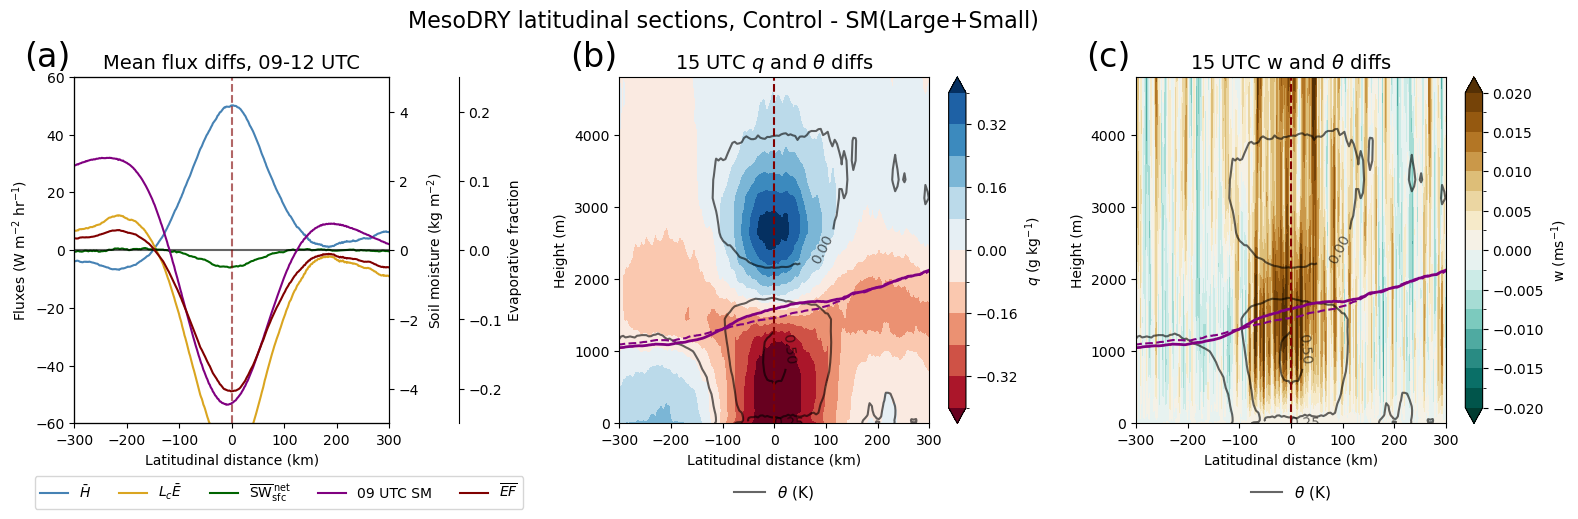

In [63]:
spatial_section_diffs("dry",15,meandim="longitude",save=True)

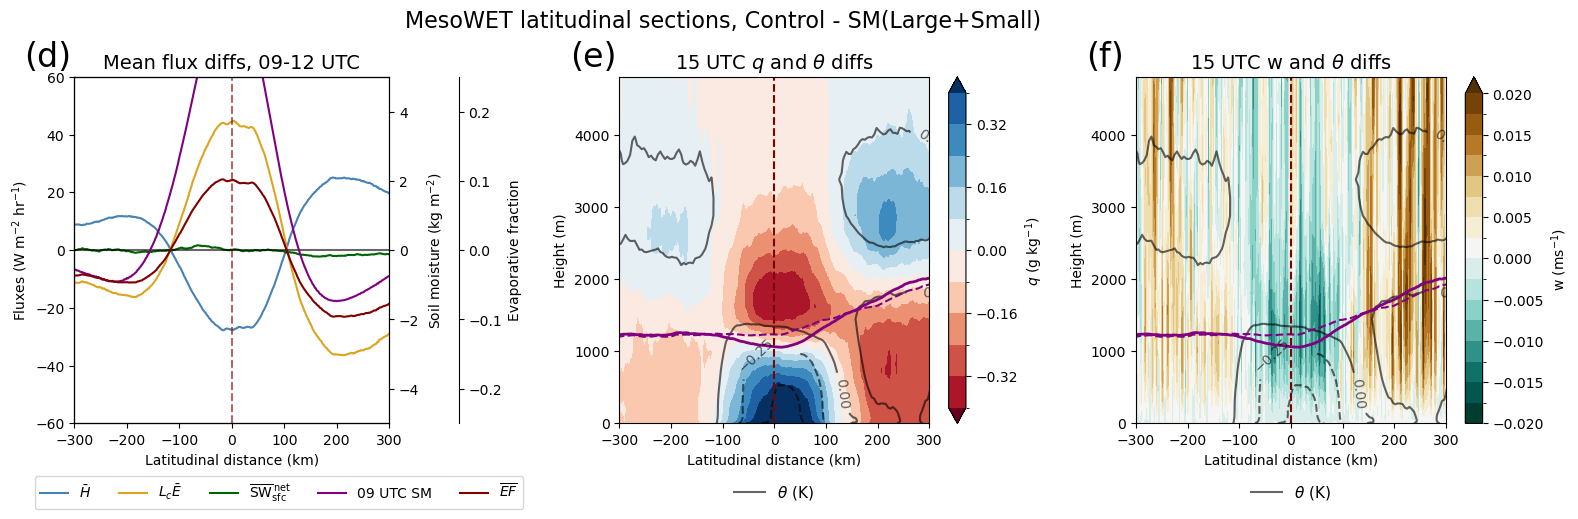

In [64]:
spatial_section_diffs("wet",15,meandim="longitude",lab_offst=3,save=True)

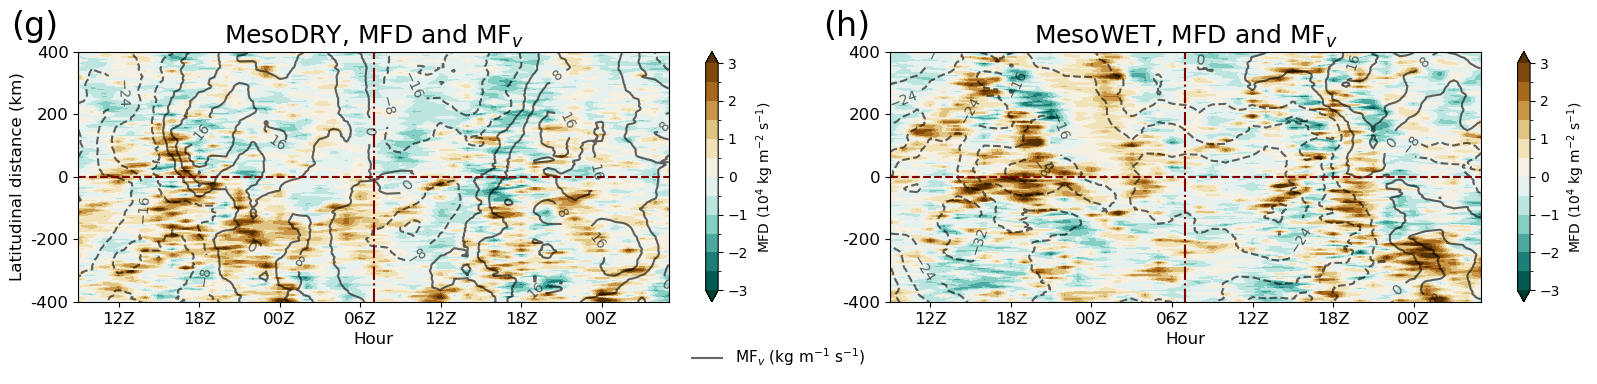

In [65]:
fig,axes=plt.subplots(1,2,figsize=(20,3.25),gridspec_kw={"wspace":0.1})

for i, loc in enumerate(["diffPmax","diffPmaxWET"]):
    mfxs=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control_run_09zSM_moisture_fluxes_filt_{}_hmoeller.nc".format(loc))
    mfxs= 1/9.81 * 100 * mfxs
    (1e4*mfxs.MFC).coarsen(latitude=3,boundary="trim").mean().plot.contourf(
                        ax=axes[i],levels=np.arange(-3,3.5,0.5),extend="both",cmap="BrBG_r",cbar_kwargs={"label":r"MFD (10$^4$ kg m$^{-2}$ s$^{-1}$)"})
    Cv=mfxs.MF_v.plot.contour(ax=axes[i],levels=np.arange(-32,32,8),colors="Black",alpha=0.6)
    axes[i].clabel(Cv)
    axes[i].set_ylim([-400,400])
    axes[i].set_xlabel("Hour",fontsize=12)
    axes[i].set_ylabel("")
    #ax.set_xticks(np.arange(9,31,3))
    #ax.set_xticklabels(["%02dZ"%(i%24) for i in np.arange(9,31,3)])
    axes[i].set_xlim([9,53])
    axes[i].set_xticks(np.arange(12,54,6))
    axes[i].set_xticklabels(["%02dZ"%(i%24) for i in np.arange(12,54,6)],fontsize=12)
    axes[i].set_yticks(np.arange(-400,500,200))
    axes[i].set_yticklabels(np.arange(-400,500,200),fontsize=12)
    axes[i].axhline(0,color="maroon",ls="--")
    #ax.axvline(12,color="maroon",ls="--")
    axes[i].axvline(31,color="maroon",ls="-.")
    axes[i].text(4,450,"("+string.ascii_lowercase[i+6]+")",fontsize=24)
    
axes[0].set_ylabel("Latitudinal distance (km)",fontsize=12)
axes[0].set_title("MesoDRY, MFD and MF$_v$",fontsize=18)
axes[1].set_title("MesoWET, MFD and MF$_v$",fontsize=18)

fig.legend(handles=[Line2D([],[], color="k", alpha=0.6, label=r"MF$_v$ (kg m$^{-1}$ s$^{-1}$)")], 
               fontsize='11', bbox_to_anchor=(0.475,-0.06), frameon=False ,loc="center") 
#fig.suptitle("Composite Hovmoellers, Control MFD and meridional moisture flux",fontsize=18,y=1.1)
#fig.text(0.07,1,"c)",fontsize=28)
fig.savefig("Paper_figs/SuppFig_patch_moisture_flux_hmoellers.png",dpi=300,bbox_inches="tight",facecolor="white")

In [66]:
# FIG S5

In [67]:
init_bins=[]
# for initialisation, D1 and MCS[init_day==0] are equivalent; but D2 will overcount as includes storms inherited from day 1
for i, props in enumerate([control48_MCS[control48_MCS.init_day==0], wg_MCS[wg_MCS.init_day==0], LO_MCS[LO_MCS.init_day==0], 
                           control48_MCS[control48_MCS.init_day==1], wg_MCS[wg_MCS.init_day==1], LO_MCS[LO_MCS.init_day==1]]):
    # need to filter out storms which have artificially "initiated" by being passed over from control; includes many mature storms, so artifical intitiation signal.
    props=props[props.start_time!=props.sim_start]
    props["start_time"]=pd.to_datetime(props.start_time)
    hours=props["start_time"].dt.hour
    #bins.append(stats.binned_statistic(hours,hours,statistic='count',bins=24,range=(0,24)))
    stat=stats.binned_statistic(hours,hours,statistic='count',bins=24,range=(0,24))
    df=pd.DataFrame(np.vstack([stat.bin_edges[:-1],stat.statistic]).T,columns=["Hour","Count"])
    # for plotting, reorder df to span 7 to 6 rather than 00 to 23:
    df=pd.concat([df.iloc[7:],df.iloc[:7]])
    df.index=["%02dZ"%i for i in df.index]
    init_bins.append(df)

diss_bins=[]
# to accurately probe natural dissipation, need to avoid experiment cut offs. Day 2 will necessarily include storms which have init_day==0, since they've kept propagating.
# n.b. LO_D2 is thus equivalent to LO_MCS[LO_MCS.end_time>(LO_MCS.sim_start+pd.Timedelta(23,"h"))
for props in [control48_MCS[control48_MCS.end_time<=(control48_MCS.sim_start+pd.Timedelta(23,"h"))], wg_MCS[wg_MCS.end_time<=(wg_MCS.sim_start+pd.Timedelta(23,"h"))], 
              LO_MCS[LO_MCS.end_time<=(LO_MCS.sim_start+pd.Timedelta(23,"h"))], control_D2, wg_D2, LO_D2]:
    props=props[props.end_time<=props.sim_end]
    hours=props.end_time.dt.hour
    stat=stats.binned_statistic(hours,hours,statistic='count',bins=24,range=(0,24))
    df=pd.DataFrame(np.vstack([stat.bin_edges[:-1],stat.statistic]).T,columns=["Hour","Count"])
    df=pd.concat([df.iloc[7:],df.iloc[:7]])
    df.index=["%02dZ"%i for i in df.index]
    diss_bins.append(df)

In [68]:
controlD1_dc_meanrains=controlD1_dc_rainvols/controlD1_dc_areas
controlD2_dc_meanrains=controlD2_dc_rainvols/controlD2_dc_areas
WGd1_dc_meanrains=WGd1_dc_rainvols/WGd1_dc_areas
WGd2_dc_meanrains=WGd2_dc_rainvols/WGd2_dc_areas
LOd1_dc_meanrains=LOd1_dc_rainvols/LOd1_dc_areas
LOd2_dc_meanrains=LOd2_dc_rainvols/LOd2_dc_areas

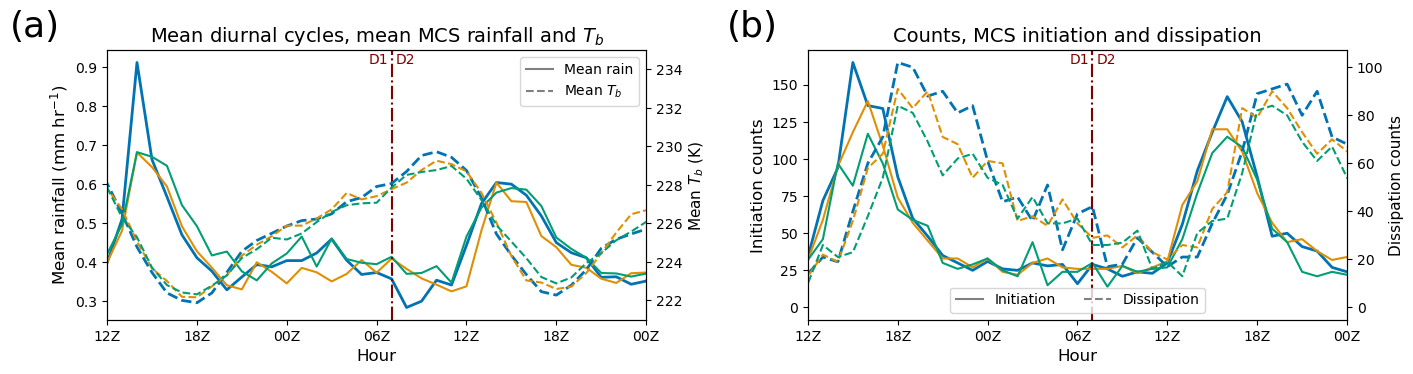

In [69]:
fig,axes=plt.subplots(1,2,figsize=(16,3.5),gridspec_kw={"wspace":0.3})
pd.concat([controlD1_dc_meanrains,controlD2_dc_meanrains]).mean(axis=1).plot(ax=axes[0],color=hues[0],lw=2)
pd.concat([WGd1_dc_meanrains.mean(axis=1),WGd2_dc_meanrains.mean(axis=1)]).plot(ax=axes[0],color=hues[1])
pd.concat([LOd1_dc_meanrains.mean(axis=1),LOd2_dc_meanrains.mean(axis=1)]).plot(ax=axes[0],color=hues[2])
ax1=axes[0].twinx()
pd.concat([controlD1_dc_tmeans.mean(axis=1),controlD2_dc_tmeans.mean(axis=1)]).plot(ax=ax1,color=hues[0],ls="--",lw=2)
pd.concat([WGd1_dc_tmeans.mean(axis=1),WGd2_dc_tmeans.mean(axis=1)]).plot(ax=ax1,color=hues[1],ls="--")
pd.concat([LOd1_dc_tmeans.mean(axis=1),LOd2_dc_tmeans.mean(axis=1)]).plot(ax=ax1,color=hues[2],ls="--")
axes[0].set_ylabel("Mean rainfall (mm hr$^{-1}$)",fontsize=12)
ax1.set_ylabel("Mean $T_b$ (K)",fontsize=11)
ax1.set_ylim([221,235])
axes[0].set_title("Mean diurnal cycles, mean MCS rainfall and $T_b$",fontsize=14)
legend_elements = [Line2D([],[],color="grey", marker="", label="Mean rain"),
                   Line2D([],[],color="grey", ls="--", marker="", label="Mean $T_b$")]
axes[0].legend(handles=legend_elements,loc="upper right")

pd.concat([init_bins[0],init_bins[3]]).Count.plot(ax=axes[1],color=hues[0],lw=2) # Control
pd.concat([init_bins[1],init_bins[4]]).Count.plot(ax=axes[1],color=hues[1]) # SM(L+S)
pd.concat([init_bins[2],init_bins[5]]).Count.plot(ax=axes[1],color=hues[2]) # SM(LO)
ax1=axes[1].twinx()
pd.concat([diss_bins[0],diss_bins[3]]).Count.plot(ax=ax1,color=hues[0],lw=2,ls="--") # Control
pd.concat([diss_bins[1],diss_bins[4]]).Count.plot(ax=ax1,color=hues[1],ls="--") # SM(L+S)
pd.concat([diss_bins[2],diss_bins[5]]).Count.plot(ax=ax1,color=hues[2],ls="--") # SM(LO)
axes[1].set_ylabel("Initiation counts",fontsize=12)
#axes[1].set_ylim([13,31.8])
#ax1.set_ylim([6000,41900])
ax1.set_ylabel("Dissipation counts",fontsize=11)
axes[1].set_title("Counts, MCS initiation and dissipation",fontsize=14)
legend_elements = [Line2D([],[],color="grey", marker="", label="Initiation"),
                   Line2D([],[],color="grey", ls="--", marker="", label="Dissipation")]
axes[1].legend(handles=legend_elements,loc="lower center",ncols=2)

for i,ax in enumerate(axes):
    ax.set_xlabel("Hour",fontsize=12)
    ax.set_xlim([5,41])
    ax.set_xticks(np.arange(5,42,6))
    ax.set_xticklabels(["%02dZ"%((hr+7)%24) for hr in np.arange(5,42,6)])
    ax.axvline(24,color="maroon",ls="-.")
    ax.text(0.486,0.95,"D1",color="maroon",transform=ax.transAxes)
    ax.text(0.536,0.95,"D2",color="maroon",transform=ax.transAxes)

axes[0].text(-0.18,1.05,"(a)", fontsize=26,transform=axes[0].transAxes)
axes[1].text(-0.15,1.05,"(b)", fontsize=26,transform=ax.transAxes)
fig.savefig("Paper_figs/SuppFig_MCS_properties_dcs.png",dpi=200,bbox_inches="tight",facecolor="white")

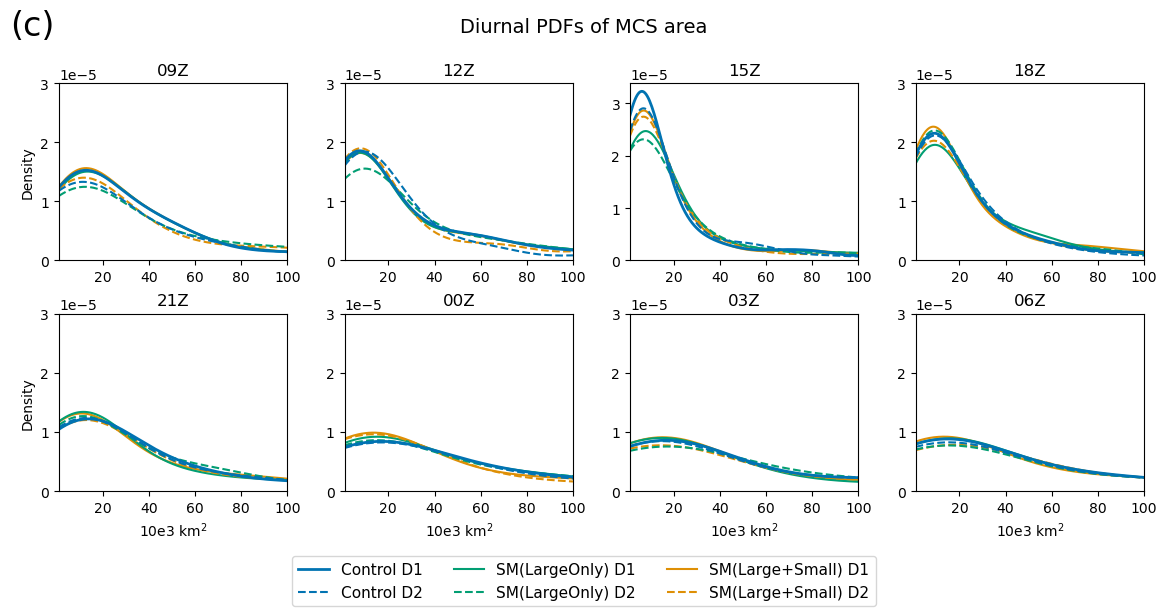

In [70]:
fig,axes=plt.subplots(2,4,figsize=(14,6),gridspec_kw={"hspace":0.3,"wspace":0.25})

for i, hr in enumerate(np.arange(9,33,3)):
    ax=axes.flatten()[i]
    sns.kdeplot(ax=ax,data=WGd1_dc_areas.loc["%02dZ"%(hr%24)].dropna(),cumulative=False,clip=[1000,100000],color=hues[1])
    sns.kdeplot(ax=ax,data=LOd1_dc_areas.loc["%02dZ"%(hr%24)].dropna(),cumulative=False,clip=[1000,100000],color=hues[2])
    sns.kdeplot(ax=ax,data=WGd2_dc_areas.loc["%02dZ"%(hr%24)].dropna(),cumulative=False,clip=[1000,100000],color=hues[1],linestyle="--")
    sns.kdeplot(ax=ax,data=LOd2_dc_areas.loc["%02dZ"%(hr%24)].dropna(),cumulative=False,clip=[1000,100000],color=hues[2],linestyle="--")
    sns.kdeplot(ax=ax,data=controlD2_dc_areas.loc["%02dZ"%(hr%24)].dropna(),cumulative=False,clip=[1000,100000],color=hues[0],linestyle="--")
    sns.kdeplot(ax=ax,data=controlD1_dc_areas.loc["%02dZ"%(hr%24)].dropna(),cumulative=False,clip=[1000,100000],color=hues[0],linewidth=2)
    ax.set_title("%02dZ"%(hr%24))
    ax.set_yticks([0,1e-5,2e-5,3e-5])
    ax.set_xlim([1000,100000])
    ax.set_xticklabels(["0","20","40","60","80","100"])
    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_yscale("log")
    if i>3:
        ax.set_xlabel("10e3 km$^2$")
    if i%4==0:
        ax.set_ylabel("Density")
    
legend_elements = [Line2D([],[],color=hues[0], marker="", lw=2, label='Control D1'),
                   Line2D([],[],color=hues[0], marker="", ls="--", label='Control D2'),
                   Line2D([],[],color=hues[2], marker="", label='SM(LargeOnly) D1'),
                   Line2D([],[],color=hues[2], marker="", ls="--", label='SM(LargeOnly) D2'),
                   Line2D([],[],color=hues[1], marker="", label='SM(Large+Small) D1'),
                   Line2D([],[],color=hues[1], marker="", ls="--", label='SM(Large+Small) D2')]

fig.subplots_adjust(bottom=0.2)
fig.legend(handles=legend_elements, fontsize='11', ncols=3, bbox_to_anchor=[0.5, 0.05], loc='center')

fig.suptitle("Diurnal PDFs of MCS area", fontsize=14, y=0.99)
fig.text(0.09,0.96,"(c)",fontsize=24)
fig.savefig("Paper_figs/SuppFig_dcyc_MCS_area_pdfs.png",dpi=300,bbox_inches="tight",facecolor="white")

In [71]:
# FIG S6

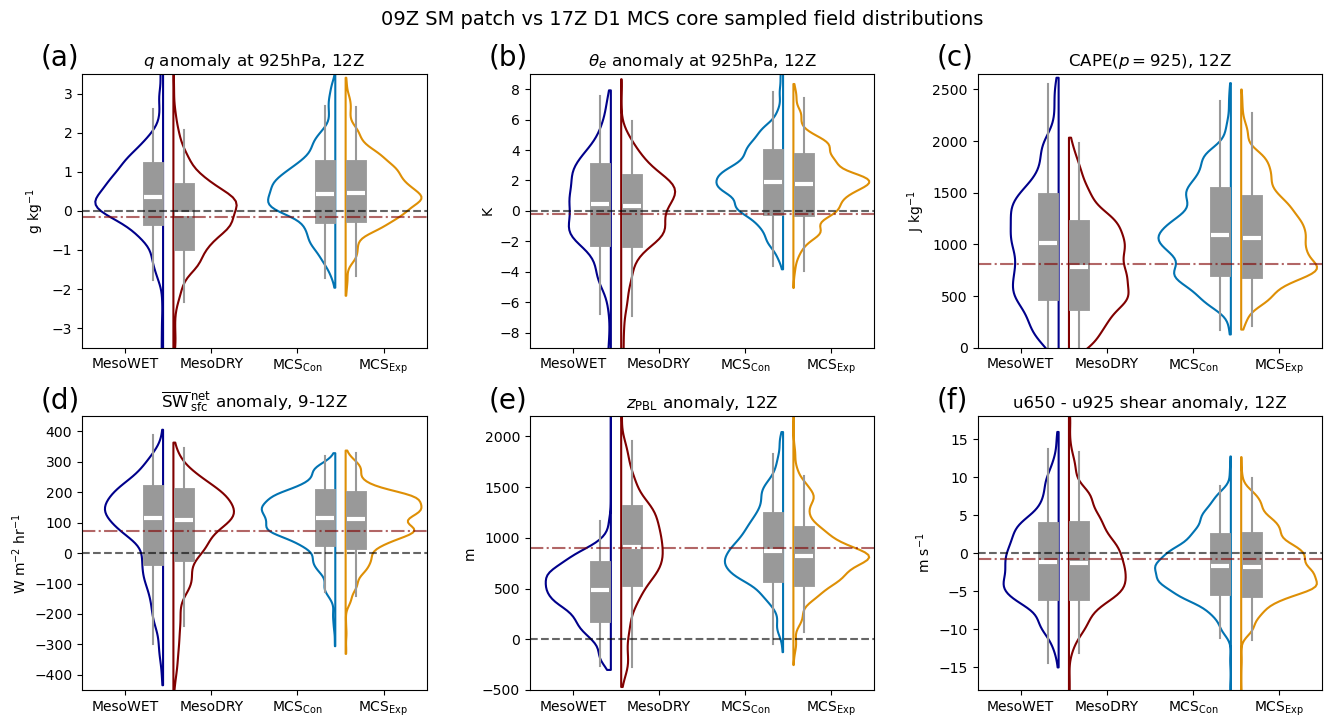

In [72]:
fig,axes = plt.subplots(2,3,figsize=(16,8),gridspec_kw={"hspace":0.25,"wspace":0.3})

units=["g kg$^{-1}$","K","J kg$^{-1}$","W m$^{-2}$ hr$^{-1}$","m","m s$^{-1}$"]
facts=[1000,1,1,1/4,1,1]#1000
names=[r"$q$ anomaly at 925hPa, 12Z",r"$\theta_e$ anomaly at 925hPa, 12Z",r"${\rm CAPE}(p=925)$, 12Z",
       r"$\rm\overline{SW}_{\, sfc}^{\,net}$ anomaly, 9-12Z", r"$z_{\rm PBL}$ anomaly, 12Z", "u650 - u925 shear anomaly, 12Z"]

for i, var in enumerate(["q925","theta_e925","CAPE","sw_accum","pblh","ushear650_925"]):
    ax=axes.flatten()[i]

    a=(con_tabD.loc[:,[var]]*facts[i]).dropna()
    a["type"]="MesoDRY"
    b=(con_tabW.loc[:,[var]]*facts[i]).dropna()
    b["type"]="MesoWET"
    c=(con_mcs_tab.loc[:,[var]]*facts[i]).dropna()
    c["type"]=r"MCS$_{\rm Con}$"
    d=(pd.concat([wg_mcs_tab,LO_mcs_tab]).loc[:,[var]]*facts[i]).dropna()#
    d["type"]=r"MCS$_{\rm Exp}$"
    df=pd.concat([b,a,c,d])

    sns.violinplot(ax=ax,data=df,x="type",y=var,split=True,inner_kws=dict(box_width=15, whis_width=1.5, color=".6"),bw_adjust=0.75,cut=0.5,
               fill=False,gap=-0.1,palette={"MesoDRY":"maroon","MesoWET":"darkblue",r"MCS$_{\rm Con}$":hues[0],r"MCS$_{\rm Exp}$":hues[1]},legend=False,common_norm=True)
        
    if i!=2:
        ax.axhline(0,color="k",ls="--",alpha=0.6)
    ax.axhline(a[var].mean(),color="maroon",ls="-.",alpha=0.6)
    ax.set_ylabel(units[i])
    ax.set_title(names[i])
    ax.set_xlabel("")
    ax.text(-0.12,1.03,"("+string.ascii_lowercase[i]+")",fontsize=20,transform=ax.transAxes)
    
axes[0,0].set_ylim([-3.5,3.5])
axes[0,1].set_ylim([-9,9])
axes[0,2].set_ylim([0,2650])
axes[1,0].set_ylim([-450,450])
axes[1,1].set_ylim([-500,2200])
axes[1,2].set_ylim([-18,18])

fig.suptitle("09Z SM patch vs 17Z D1 MCS core sampled field distributions",fontsize=14,y=0.96)
fig.savefig("Paper_figs/SuppFig_further_pdf_sampling.png",dpi=300,bbox_inches="tight",facecolor="white")

In [73]:
# FIG S7

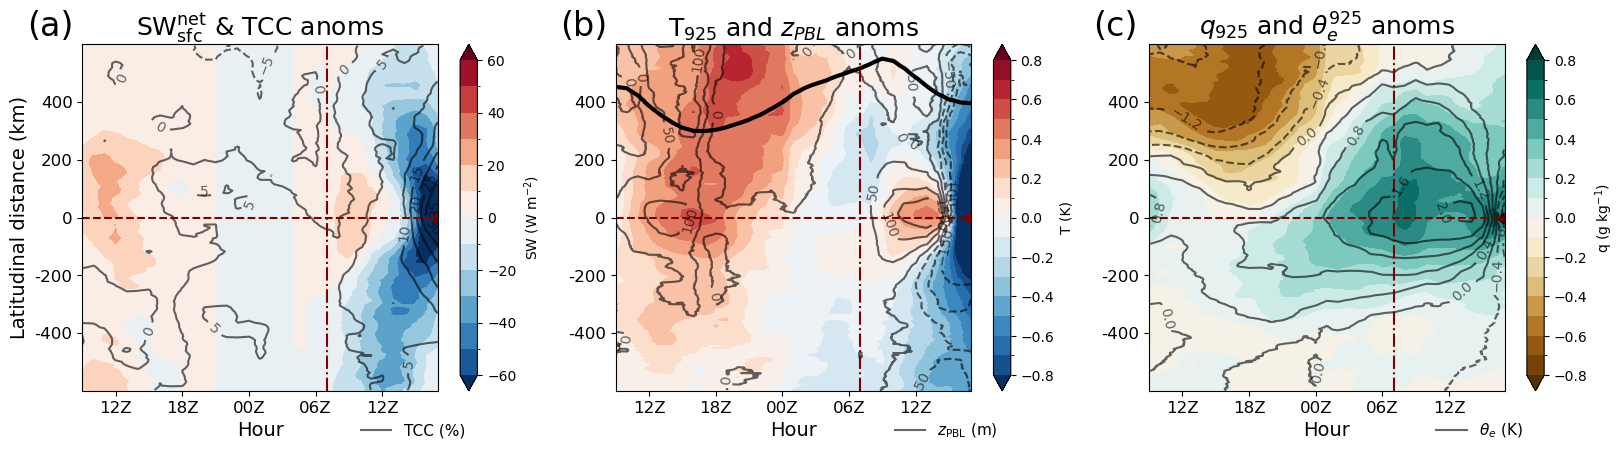

In [74]:
mcs_hmoeller("Control_48hr_runs_D1",lab_offst=0,save=True,supp=True)

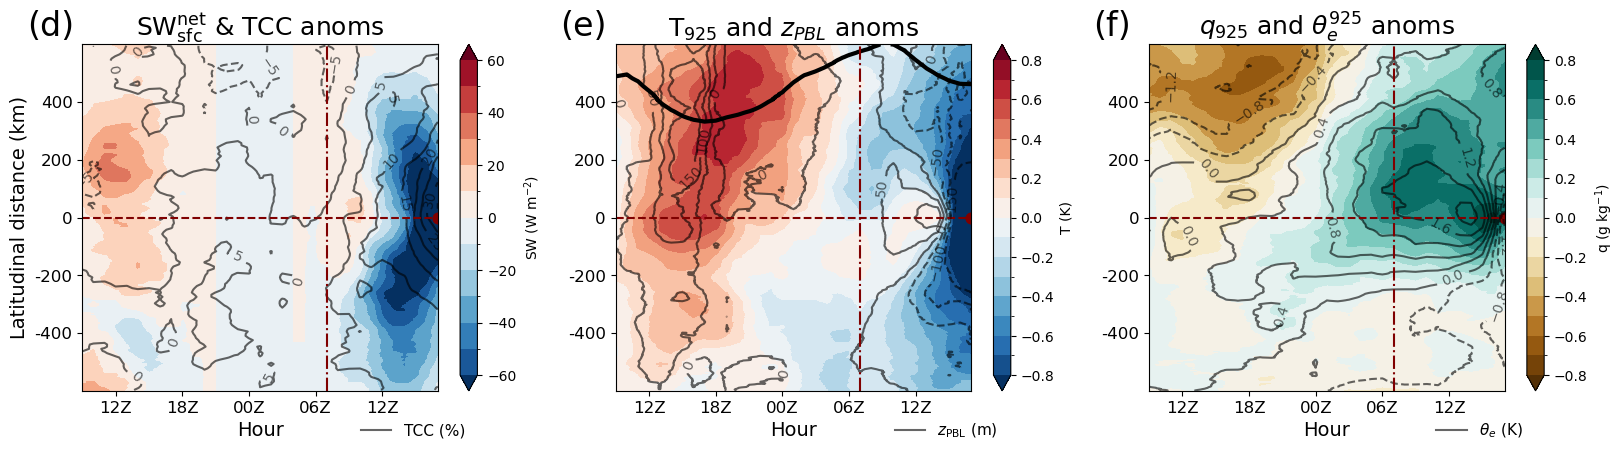

In [75]:
mcs_hmoeller("Large_only_D1",lab_offst=3,save=True,supp=True)

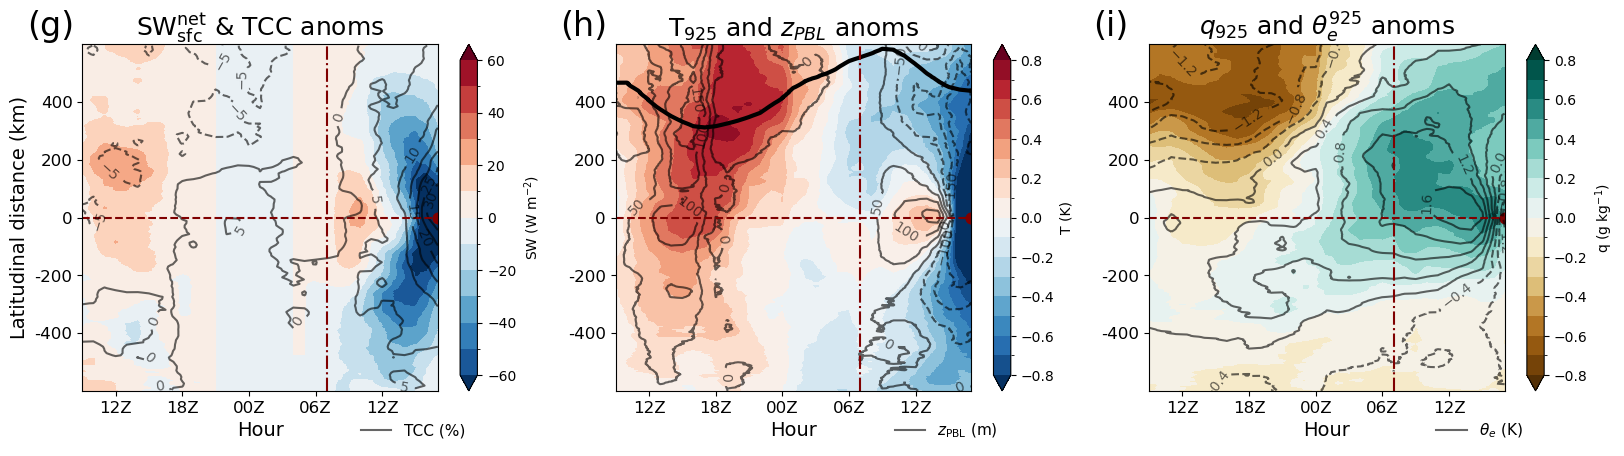

In [76]:
mcs_hmoeller("Wg_mcs_D1",lab_offst=6,save=True,supp=True)

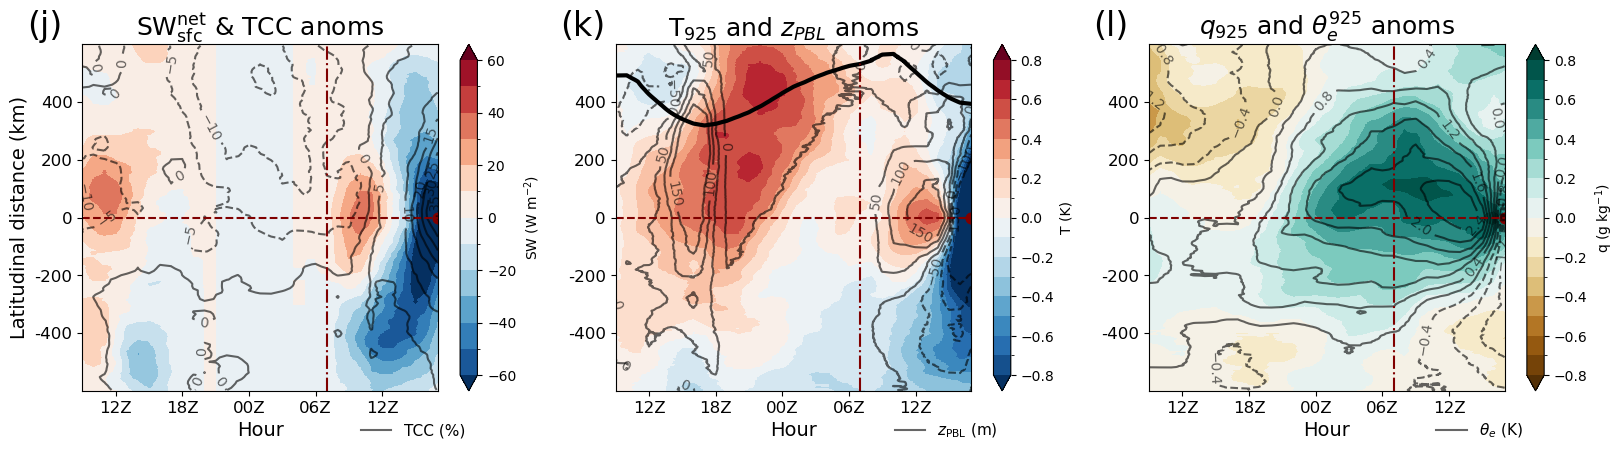

In [77]:
mcs_hmoeller("Large_only_D2",lab_offst=9,save=True,supp=True)

In [78]:
# Other

In [79]:
def rainfall_accums_limited(time,field,day): # ROW OF 3
    fig,axes=plt.subplots(1,3,figsize=(18,4.5))
    ext=0
    if time=="post":
        ext=1
    day=str(day)

    labs=["Control D"+day,"SM(LargeOnly) D"+day,"SM(Large+Small) D"+day]
    for i, sim in enumerate(["Control_48hr_runs_D"+day,"Large_only_D"+day,"Wg_mcs_D"+day]):
        precip_accums=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/{}_17zMCS_precip_accums_filt_core_12z_composites.nc".format(sim))
        if time=="pre" and field=="sm":
            precip_accums["soil_moisture_pre"]=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/{}_17zMCS_2dfields_filt_core_07z_composites.nc".format(
                                                                sim))["sm_anom"]
            tstr="Soil moisture anomaly, "
        if field=="sm":
            cb=precip_accums["soil_moisture_{}".format(time)].plot.contourf(ax=axes[i],cmap="RdBu",add_colorbar=False,extend="both",vmax=3.5,levels=11)
            lab=r"Soil moisture anomaly (kg m$^{-2}$)"
            tstr="Soil moisture anomaly, "
        elif field=="precip":
            cb=precip_accums["precip_accum_{}".format(time)].plot.contourf(ax=axes[i],cmap="cividis",levels=[0.5,1,2,4,8,12,16],extend="both",add_colorbar=False)#9+ext*4,vmax=9+ext*4,vmin=1
            lab="Accumulated rainfall (mm)"
            tstr="Accumulated rainfall, "
        elif field=="precip_diffs":
            tstr="Accumulated rainfall, "
            if i==0:
                cb=precip_accums["precip_accum_{}".format(time)].plot.contourf(ax=axes[i],cmap="cividis",levels=[0.5,1,2,4,8,12,16],extend="both",cbar_kwargs={"label":"mm"})
                con=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/Control_48hr_runs_D%s_17zMCS_precip_accums_filt_core_12z_composites.nc"%day
                                   )["precip_accum_{}_anom".format(time)]
            else:
                cb=(precip_accums["precip_accum_{}_anom".format(time)]-con).coarsen(latitude=5,longitude=5,boundary="trim").mean(
                             ).plot.contourf(ax=axes[i],cmap="RdBu",levels=11,vmax=4,extend="both",cbar_kwargs={"label":"mm"})

        Cprecip=precip_accums["precip_accum_{}_prob".format(time)].coarsen(latitude=10,longitude=10,boundary="trim"
                                    ).mean().plot.contour(ax=axes[i],colors="Black",levels=[0.1,0.2,0.3,0.4,0.5*ext],alpha=0.6)
        axes[i].clabel(Cprecip)
        axes[i].set_title(labs[i],fontsize=14)#+" (n=%s)"%precip_accums.attrs["cores_post_filter"])
        axes[i].scatter(0,0,25,marker="x",color="maroon")
        axes[i].set_ylabel("km")
        axes[i].set_xlabel("km")
        axes[i].set_aspect(1)
        axes[i].text(-750,630,"("+string.ascii_lowercase[i]+")",fontsize=22)
        if field=="precip_diffs" and i>0:
            axes[i].set_title(labs[i]+" - Control",fontsize=14)
            axes[i].set_ylabel("")
        axes[i].set_yticks(np.arange(-400,500,200))
        axes[i].set_xticks(np.arange(-400,500,200))

    if field!="precip_diffs":
        cax = fig.add_axes([0.91,0.23,0.01,0.6])
        fig.colorbar(cb, cax = cax, orientation = "vertical", label = lab)
    fig.legend(handles=[Line2D([],[], color="k", alpha=0.6, label="Prob. accum.> 5 mm")], fontsize='10', bbox_to_anchor=(0.72,0.05), frameon=True)#bbox_to_anchor=(0.98,0.18), frameon=False)
    fig.suptitle(tstr+"12 hours {} 17Z MCS cores".format(time.lower()),fontsize=14, y=1.0)

    #fig.savefig("Paper_figs/SuppFig_MCS_D{}_precip_accums.png".format(day),dpi=300,bbox_inches="tight",facecolor="white")

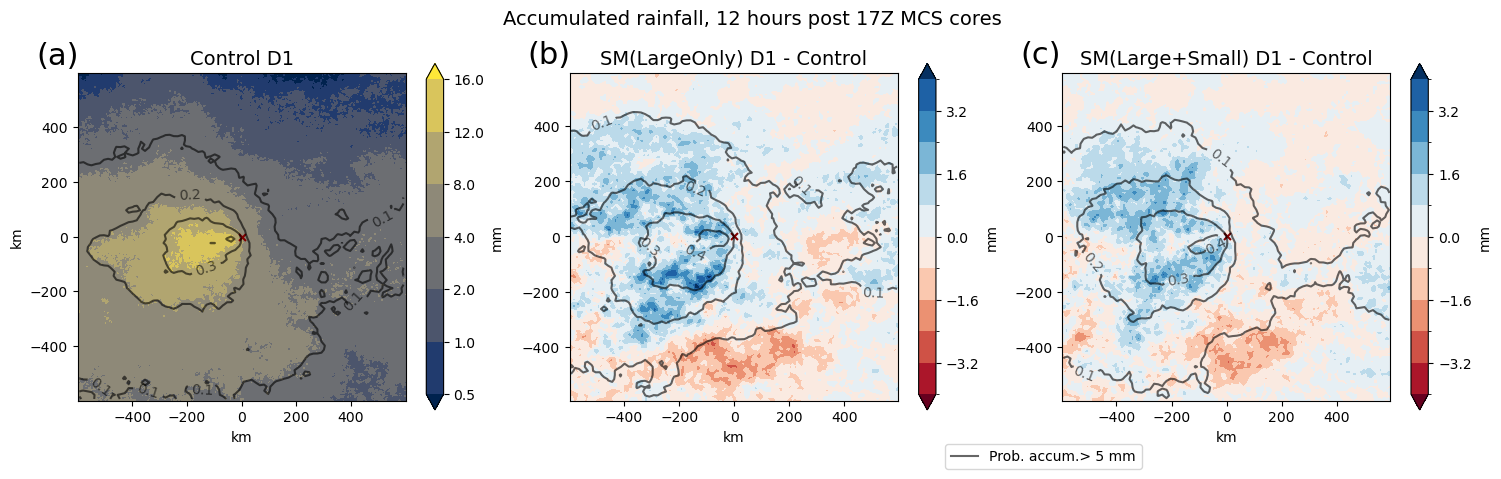

In [80]:
rainfall_accums_limited("post","precip_diffs",1)

Text(0.5, 1.03, '09 UTC SM and 09-12 UTC $\\bar H$ anomalies')

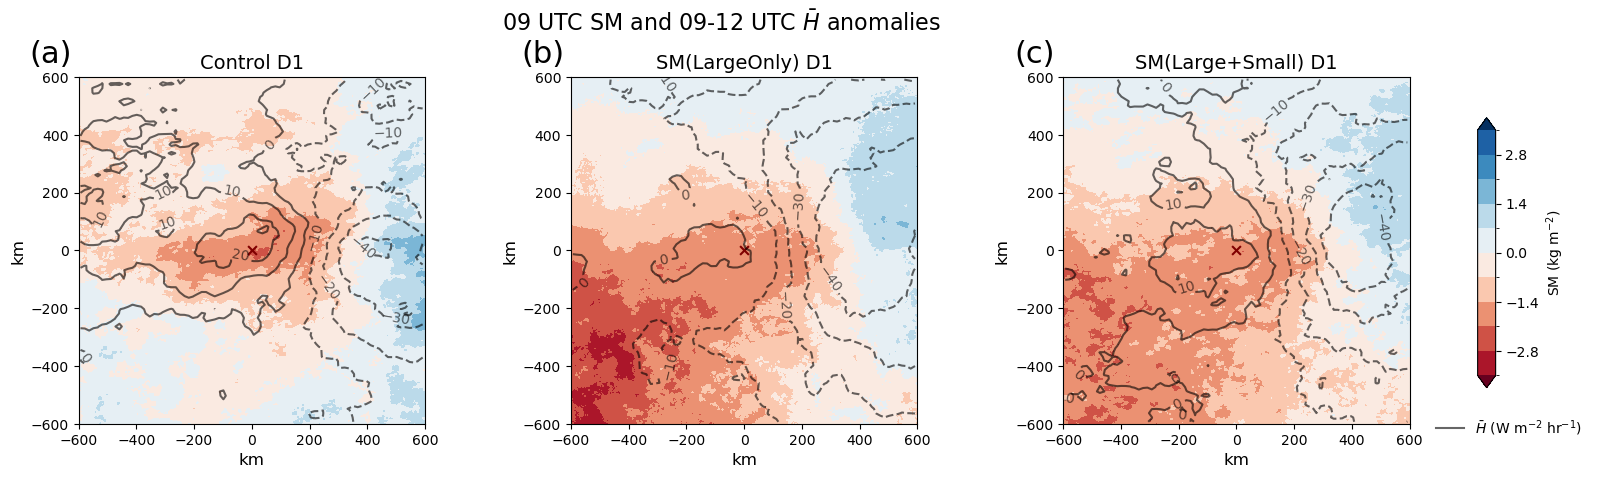

In [81]:
fig,axes=plt.subplots(1,3,figsize=(18,4.5))
day=str(1)

labs=["Control D"+day,"SM(LargeOnly) D"+day,"SM(Large+Small) D"+day]
for i, sim in enumerate(["Control_48hr_runs_D"+day,"Large_only_D"+day,"Wg_mcs_D"+day]):
    ae=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/{}_17zMCS_hfx_accums_filt_core_12z_composites.nc".format(sim)).ae_anom
    sm=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/{}_17zMCS_hfx_accums_filt_core_12z_composites.nc".format(sim)).pre_sm_anom
    h=xr.open_dataset("/gws/nopw/j04/lmcs/bmaybee/lmcs_run_outputs/composites/Control48_climatology/{}_17zMCS_hfx_accums_filt_core_12z_composites.nc".format(sim)).shfx_anom
    
    cb=sm.plot.contourf(ax=axes[i],levels=11,vmax=3.5,extend="both",cmap="RdBu",add_colorbar=False)
    Ch=(h/4).coarsen(latitude=10,longitude=10,boundary="trim").mean().plot.contour(ax=axes[i],colors="Black",levels=np.arange(-40,45,10),alpha=0.6)
    #Cz=sm.coarsen(latitude=10,longitude=10,boundary="trim").mean().plot.contour(ax=axes[i],colors="Green",levels=np.arange(-3,4))
    axes[i].clabel(Ch)
    #axes[i].clabel(Cz)
    axes[i].set_title(labs[i],fontsize=14)#+" (n=%s)"%
    #                  (ds.attrs["number_cores"]-ds.attrs["orog_filtered"]-ds.attrs["cold_cloud_filtered"]-ds.attrs["init_filtered"]))
    axes[i].scatter(0,0,40,marker="x",color="maroon")
    axes[i].set_ylabel("km",fontsize=12)
    axes[i].set_xlabel("km",fontsize=12)
    axes[i].set_aspect(1)
    axes[i].text(-770,650,"("+string.ascii_lowercase[i]+")",fontsize=22)

cax = fig.add_axes([0.92,0.19,0.01,0.6])
fig.colorbar(cb, cax = cax, orientation = "vertical", label = r"SM (kg m$^{-2}$)")
#fig.suptitle("09 UTC SM anomalies",fontsize=14, y=1.0)
fig.legend(handles=[Line2D([],[], color="black", alpha=0.6, label=r"$\bar H$ (W m$^{-2}$ hr$^{-1}$)")], fontsize='10', bbox_to_anchor=(0.89,0.15), loc="upper left", frameon=False)

fig.suptitle(r"09 UTC SM and 09-12 UTC $\bar H$ anomalies",fontsize=16, y=1.03)
#fig.savefig("Paper_figs/SuppFig_MCS_SM_composites.png",dpi=300,bbox_inches="tight",facecolor="white")